# Camparative Assessment of Random Forest, SVM and CatBoost Performances on Residential Property Price Around Osun-Osogbo Tourist Attraction
    Author: Adeyemi Adedoyin Simeon
    Email:  donsitechitacad@gmail.com
    Date:   Wed., May 18, 2022

# Importing Libraries

In [133]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from pandas import get_dummies

# Parameter Tunning
from sklearn.model_selection import GridSearchCV

# Machine Learning Classification libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier, Pool, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Performance evaluation Metrics libs
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
r2_score, roc_auc_score, confusion_matrix, classification_report, f1_score, roc_curve

# For saving trained models
import pickle

### Utility funstions

In [2]:
def get_unique_values_in_df(df, start_idx = 0):
    for i,col in enumerate(df.columns[start_idx:]):
        print(f'{i+1}.) {col}: \n{df[col].unique()}\n')
        

In [3]:
METRICS = ['accuracy', 'precision', 'recall', 'f_measure', 'r2']

# Loading Dataset

In [4]:
df = pd.read_excel('dataset/Osun Osogbo study.xlsx')
df.head()

,Respondent,DFCS,SEX,Education,Employment,Annual Income,House Types,Age of Bld,Period of living,State of Security,...,Gd. Rd netwk,Avail of Area security,Awareness of d groove,Awareness of gov regulation,Bad Experience due to groove,Nature of Experien,Attitude living close,Reason for living close,Ready to relocate?,Why u wont build close to site
0,1.0,200m,M,<SSCE,pd employment,">100,000",Tenement,Faily Old,<5YRS,Very good,...,Yes,Yes,Yes,yes,Yes,Rituals,Comfortable,Low rent,Yes,Religious rites
1,2.0,200m,M,<SSCE,pd employment,">100,000",Tenement,Faily Old,<5YRS,Very good,...,Yes,Yes,Yes,yes,Yes,Rituals,Comfortable,Low rent,Yes,Religious rites
2,3.0,200m,M,<SSCE,pd employment,">100,000",Tenement,Faily Old,<5YRS,Very good,...,Yes,Yes,Yes,yes,Yes,Rituals,Comfortable,Low rent,Yes,Religious rites
3,4.0,200m,M,<SSCE,pd employment,">100,000",Tenement,Faily Old,<5YRS,Very good,...,Yes,Yes,Yes,yes,Yes,Rituals,Comfortable,Low rent,Yes,Cultural factor
4,5.0,200m,M,<SSCE,pd employment,">100,000",Tenement,Faily Old,<5YRS,Very good,...,Yes,Yes,Yes,yes,Yes,Rituals,Comfortable,Low rent,Yes,Cultural factor


# Exploratory Data Analysis (EDA)

In [5]:
df.head(3)

,Respondent,DFCS,SEX,Education,Employment,Annual Income,House Types,Age of Bld,Period of living,State of Security,...,Gd. Rd netwk,Avail of Area security,Awareness of d groove,Awareness of gov regulation,Bad Experience due to groove,Nature of Experien,Attitude living close,Reason for living close,Ready to relocate?,Why u wont build close to site
0,1.0,200m,M,<SSCE,pd employment,">100,000",Tenement,Faily Old,<5YRS,Very good,...,Yes,Yes,Yes,yes,Yes,Rituals,Comfortable,Low rent,Yes,Religious rites
1,2.0,200m,M,<SSCE,pd employment,">100,000",Tenement,Faily Old,<5YRS,Very good,...,Yes,Yes,Yes,yes,Yes,Rituals,Comfortable,Low rent,Yes,Religious rites
2,3.0,200m,M,<SSCE,pd employment,">100,000",Tenement,Faily Old,<5YRS,Very good,...,Yes,Yes,Yes,yes,Yes,Rituals,Comfortable,Low rent,Yes,Religious rites


In [6]:
df.tail()

,Respondent,DFCS,SEX,Education,Employment,Annual Income,House Types,Age of Bld,Period of living,State of Security,...,Gd. Rd netwk,Avail of Area security,Awareness of d groove,Awareness of gov regulation,Bad Experience due to groove,Nature of Experien,Attitude living close,Reason for living close,Ready to relocate?,Why u wont build close to site
163,164.0,800m,F,B.Sc,retired,Above 500k,3bedrm,old,Above 5yrs,Bad,...,No,No,Yes,No,No,0,Indifferent,No Reason,No,Infrastructural Fcailities
164,165.0,800m,F,M.Sc/PhD,retired,Above 500k,3bedrm,old,Above 5yrs,Worse,...,No,No,Yes,No,No,0,Indifferent,No Reason,No,Infrastructural Fcailities
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,DFCS,DISTANCE FROM CULTURAL SITE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Respondent                      165 non-null    float64
 1   DFCS                            166 non-null    object 
 2   SEX                             166 non-null    object 
 3   Education                       165 non-null    object 
 4   Employment                      165 non-null    object 
 5   Annual Income                   165 non-null    object 
 6   House Types                     165 non-null    object 
 7   Age of Bld                      165 non-null    object 
 8   Period of living                165 non-null    object 
 9   State of Security               165 non-null    object 
 10  State of Exterior               165 non-null    object 
 11  State of Interior               165 non-null    object 
 12  Rent p.a                        165 

### Peeping into the dataset unique values

In [8]:
get_unique_values_in_df(df=df)

1.) Respondent: 
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165.  nan]

2.) DFCS: 
['200m' '400m' '600m' '800m' nan 'DFCS']

3.) SEX: 
['M' 'F' nan 'DISTANCE FROM CULTURAL SITE']

4.) Education: 
['<SSCE' 'SSCE'

## Dealing with null values

In [9]:
# Counting number of nulls per columns (in each variable)
df.isnull().sum()

Respondent                        3
DFCS                              2
SEX                               2
Education                         3
Employment                        3
Annual Income                     3
House Types                       3
Age of Bld                        3
Period of living                  3
State of Security                 3
State of Exterior                 3
State of Interior                 3
Rent p.a                          3
Dist. to work                     3
Dist to place of worship          3
Dist to shopping                  3
Avail. Of Electricty              3
Avail. Of Water                   3
Gd. Rd netwk                      3
Avail of Area security            3
Awareness of d groove             3
Awareness of gov regulation       3
Bad Experience due to groove      3
Nature of Experien                3
Attitude living close             3
Reason for living close           3
Ready to relocate?                3
Why u wont build close to si

In [10]:
# Removing rows with at least 20 NAN out of 27 columns available

df.dropna(axis='index', how='any', thresh=20, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Respondent                      165 non-null    float64
 1   DFCS                            165 non-null    object 
 2   SEX                             165 non-null    object 
 3   Education                       165 non-null    object 
 4   Employment                      165 non-null    object 
 5   Annual Income                   165 non-null    object 
 6   House Types                     165 non-null    object 
 7   Age of Bld                      165 non-null    object 
 8   Period of living                165 non-null    object 
 9   State of Security               165 non-null    object 
 10  State of Exterior               165 non-null    object 
 11  State of Interior               165 non-null    object 
 12  Rent p.a                        165 

In [11]:
df.tail()

,Respondent,DFCS,SEX,Education,Employment,Annual Income,House Types,Age of Bld,Period of living,State of Security,...,Gd. Rd netwk,Avail of Area security,Awareness of d groove,Awareness of gov regulation,Bad Experience due to groove,Nature of Experien,Attitude living close,Reason for living close,Ready to relocate?,Why u wont build close to site
160,161.0,800m,F,B.Sc,retired,Above 500k,3bedrm,old,Above 5yrs,Bad,...,No,No,Yes,No,No,0,Indifferent,No Reason,No,Infrastructural Fcailities
161,162.0,800m,F,B.Sc,retired,Above 500k,3bedrm,old,Above 5yrs,Bad,...,No,No,Yes,No,No,0,Indifferent,No Reason,No,Infrastructural Fcailities
162,163.0,800m,F,B.Sc,retired,Above 500k,3bedrm,old,Above 5yrs,Bad,...,No,No,Yes,No,No,0,Indifferent,No Reason,No,Infrastructural Fcailities
163,164.0,800m,F,B.Sc,retired,Above 500k,3bedrm,old,Above 5yrs,Bad,...,No,No,Yes,No,No,0,Indifferent,No Reason,No,Infrastructural Fcailities
164,165.0,800m,F,M.Sc/PhD,retired,Above 500k,3bedrm,old,Above 5yrs,Worse,...,No,No,Yes,No,No,0,Indifferent,No Reason,No,Infrastructural Fcailities


In [12]:
## Checking if there are still null values

df.isnull().sum()

Respondent                        0
DFCS                              0
SEX                               0
Education                         0
Employment                        0
Annual Income                     0
House Types                       0
Age of Bld                        0
Period of living                  0
State of Security                 0
State of Exterior                 0
State of Interior                 0
Rent p.a                          0
Dist. to work                     0
Dist to place of worship          0
Dist to shopping                  0
Avail. Of Electricty              0
Avail. Of Water                   0
Gd. Rd netwk                      0
Avail of Area security            0
Awareness of d groove             0
Awareness of gov regulation       0
Bad Experience due to groove      0
Nature of Experien                0
Attitude living close             0
Reason for living close           0
Ready to relocate?                0
Why u wont build close to si

# DATA PREPROCESSING

# Respondents Data Distributions

## Moderating Data Values

In [13]:
def moderate_income_col(val):
    val = str(val)
    if val.startswith('>'):
        return '<100k'
    elif val.startswith('101k'):
        return '101k-200k'
    elif val.startswith('201k'):
        return '201k-300k'
    elif val.startswith('301k'):
        return '301k-400k'
    elif val.startswith('401k'):
        return '401k-500k'
    elif val.startswith('Above'):
        return '>500k'
    else:
        return '0k'

In [14]:
def remove_space_capitalize(val):
    val = str(val)
    return val.strip().upper()

In [15]:
def moderate_age_of_building(val):
    val = str(val)
    if val.startswith('FAI') and val.endswith('OLD'):
        return 'Fairly Old'
    elif val.startswith('FAI') and val.endswith('NEW'):
        return 'Fairly New'
    elif val.startswith('NEW'):
        return 'New'
    elif val.startswith('OLD'):
        return 'Old'
    elif val.startswith('VERY') and val.endswith('OLD'):
        return 'Very Old'
    elif val.startswith('VERY') and val.endswith('NEW'):
        return 'Very New'
    

In [16]:
def moderate_len_of_stay(val):
    val = str(val)
    val = val.upper()
    if val.startswith('ABOVE') or val.startswith('>'):
        return '>5YRS'
    elif val.startswith('<'):
        return '<5YRS'

In [17]:
def moderate_rent_pa(rent):
    rent = str(rent).upper()
    if rent.startswith('100K'):
        return '101K-200K'
    elif rent.startswith('200K'):
        return '201K-300K'
    elif rent.startswith('300K'):
        return '301K-400K'
    elif rent.startswith('400K'):
        return '401K-500K'
    elif rent.startswith('>50'):
        return '>300K'
    else:
        return rent
    

In [18]:
df['Annual Income'] = df['Annual Income'].map(moderate_income_col)

In [19]:
df['Age of Bld'] = df['Age of Bld'].map(remove_space_capitalize)
df['Period of living'] = df['Period of living'].map(remove_space_capitalize)
df['Rent p.a'] = df['Rent p.a'].map(remove_space_capitalize)

In [20]:
df['Age of Bld'] = df['Age of Bld'].map(moderate_age_of_building)
df['Period of living'] = df['Period of living'].map(moderate_len_of_stay)
# df['Rent p.a'] = df['Rent p.a'].map(lambda rent: '>300k' if str(rent).startswith('>50') else rent)
df['Rent p.a'] = df['Rent p.a'].map(moderate_rent_pa)

In [21]:
df['Period of living'].map(moderate_len_of_stay)

0      <5YRS
1      <5YRS
2      <5YRS
3      <5YRS
4      <5YRS
       ...  
160    >5YRS
161    >5YRS
162    >5YRS
163    >5YRS
164    >5YRS
Name: Period of living, Length: 165, dtype: object

In [22]:
# Renaming 'Employment' column by removing space from column name
df['Employment'] = df['Employment ']
df.drop(columns='Employment ', inplace=True)
df.columns

Index(['Respondent', 'DFCS', 'SEX', 'Education', 'Annual Income',
       'House Types', 'Age of Bld', 'Period of living', 'State of Security',
       'State of Exterior', 'State of Interior', 'Rent p.a', 'Dist. to work',
       'Dist to place of worship', 'Dist to shopping', 'Avail. Of Electricty',
       'Avail. Of Water', 'Gd. Rd netwk', 'Avail of Area security',
       'Awareness of d groove', 'Awareness of gov regulation',
       'Bad Experience due to groove', 'Nature of Experien',
       'Attitude living close', 'Reason for living close',
       'Ready to relocate?', 'Why u wont build close to site', 'Employment'],
      dtype='object')

# VISUALIZATIONS 

### Preparing data for visualizations

In [23]:
distFrmSite_distr = df.DFCS.value_counts()
gender_distr = df.SEX.value_counts()
edu_distr = df.Education.value_counts()
employ_distr = df.Employment.value_counts()
income_distr = df['Annual Income'].value_counts()
house_types_distr = df['House Types'].value_counts()
building_age_distr = df['Age of Bld'].value_counts()
length_of_stay = df['Period of living'].value_counts()
security_state_distr = df['State of Security'].value_counts()
rentage = df['Rent p.a'].value_counts()

### Gender Distribution

In [24]:
gender_distr

F    89
M    76
Name: SEX, dtype: int64

Text(0, 0.5, 'Counts')

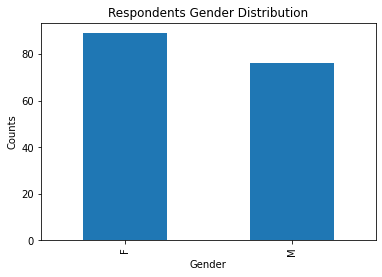

In [25]:
gender_distr.plot.bar()
plt.title('Respondents Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Counts')

### Educational Status of Residents

In [26]:
edu_distr

SSCE        38
OND         38
<SSCE       37
HND         28
B.Sc        23
M.Sc/PhD     1
Name: Education, dtype: int64

Text(0, 0.5, 'Counts')

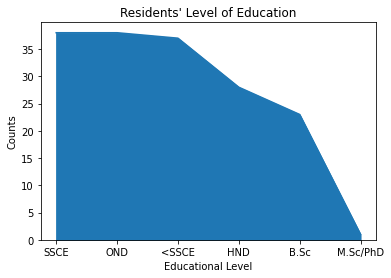

In [27]:
edu_distr.plot.area()
plt.title('Residents\' Level of Education')
plt.xlabel('Educational Level')
plt.ylabel('Counts')

### Employment Status of Residents

In [65]:
employ_distr = employ_distr.sort_values(ascending=True)
employ_distr

retired          12
Unemployed       37
self employed    58
pd employment    58
Name: Employment, dtype: int64

Text(0, 0.5, 'Status')

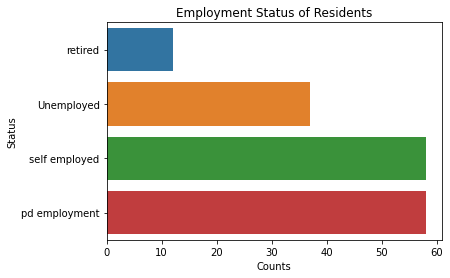

In [66]:
sns.barplot(x=employ_distr.values, y=employ_distr.index)
plt.title('Employment Status of Residents')
plt.xlabel('Counts')
plt.ylabel('Status')

### Residents Income Distribution

In [29]:
income_distr

>500k        53
0k           45
401k-500k    25
301k-400k    25
201k-300k     7
101k-200k     5
<100k         5
Name: Annual Income, dtype: int64

Text(0, 0.5, 'Income')

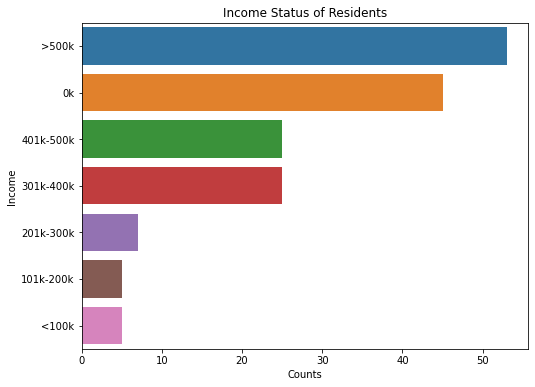

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=income_distr.values, y=income_distr.index)
plt.title('Income Status of Residents')
plt.xlabel('Counts')
plt.ylabel('Income')

### House Types in the Area

In [31]:
house_types_distr

Tenement    101
3bedrm       38
2bedrm       16
Others       10
Name: House Types, dtype: int64

Text(0, 0.5, 'Status')

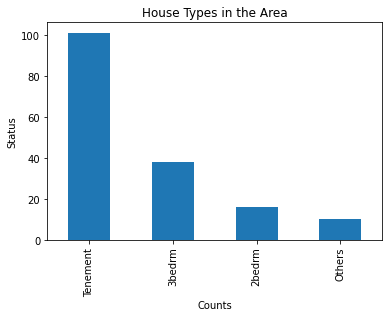

In [32]:
house_types_distr.plot.bar()
plt.title('House Types in the Area')
plt.xlabel('Counts')
plt.ylabel('Status')

### Age of Buildings in Area

In [33]:
building_age_distr

Old           58
Fairly Old    42
Fairly New    33
New           19
Very Old      13
Name: Age of Bld, dtype: int64

Text(0, 0.5, 'Counts')

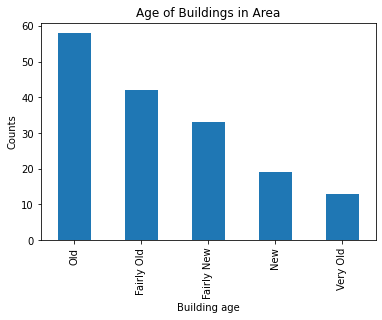

In [34]:
building_age_distr.T.plot.bar()
plt.title('Age of Buildings in Area')
plt.xlabel('Building age')
plt.ylabel('Counts')

### Length of time Residents stayed in Area

Text(0, 0.5, 'Counts')

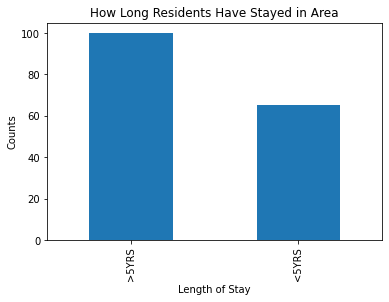

In [35]:
length_of_stay.plot.bar()
plt.title('How Long Residents Have Stayed in Area')
plt.xlabel('Length of Stay')
plt.ylabel('Counts')

### State of Security in the Area

In [68]:
security_state_distr

Good         77
Bad          38
Very good    36
Worse        14
Name: State of Security, dtype: int64

Text(0, 0.5, 'Counts')

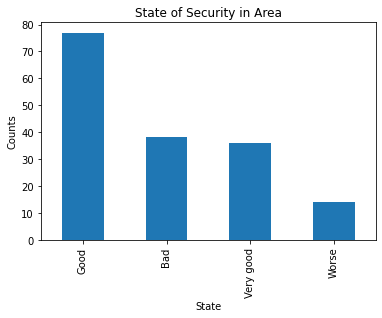

In [67]:
security_state_distr.plot.bar()
plt.title('State of Security in Area')
plt.xlabel('State')
plt.ylabel('Counts')

### Availability of Basic Social Amenities in Area

In [37]:
elect = df['Avail. Of Electricty'].value_counts()
water = df['Avail. Of Water'].value_counts()
good_road = df['Gd. Rd netwk'].value_counts()
area_security = df['Avail of Area security'].value_counts()

elect.name = 'Electricity'
water.name = 'Water'
good_road.name = 'Good Road'
area_security.name = 'Area security'

amenities = pd.concat([water, elect, good_road, area_security], axis='columns')

# changing null values into 0
amenities.fillna(0, axis='index', inplace=True) 

amenities

,Water,Electricity,Good Road,Area security
Yes,138,165.0,84,142
No,27,0.0,81,23


Text(0, 0.5, 'Respondent Counts')

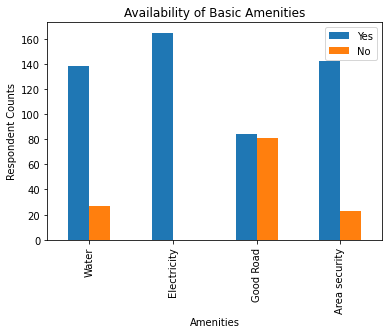

In [38]:
amenities.T.plot.bar()
plt.title('Availability of Basic Amenities')
plt.xlabel('Amenities')
plt.ylabel('Respondent Counts')

### State of Buildings in the Area

In [39]:
interior = df['State of Interior'].value_counts()
exterior = df['State of Exterior'].value_counts()

interior.name = 'Interior'
exterior.name = 'Exterior'

building_state_distr = pd.concat([interior, exterior], axis='columns')

building_state_distr

,Interior,Exterior
Good,119,101
Bad,46,64


Text(0, 0.5, 'Counts')

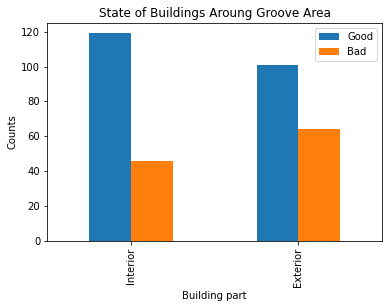

In [40]:
building_state_distr.T.plot.bar()
plt.title('State of Buildings Aroung Groove Area')
plt.xlabel('Building part')
plt.ylabel('Counts')

In [ ]:
building_state_distr.T.plot.bar()
plt.title('State of Buildings Aroung Groove Area')
plt.xlabel('Building part')
plt.ylabel('Counts')

### Closeness/Distance measures to work, religious places and market

In [41]:
def moderate_dist_columns(val):
    val = str(val)
    if val.startswith('Near'):
        return 'Near <20mins'
    elif val.startswith('Far'):
        return 'Far >20mins'
    else:
        return 'Nil'

In [42]:
df['Dist. to work'] = df['Dist. to work'].map(moderate_dist_columns)
df['Dist to shopping'] = df['Dist to shopping'].map(moderate_dist_columns)
df['Dist to place of worship'] = df['Dist to place of worship'].map(moderate_dist_columns)

In [43]:
work_dist = df['Dist. to work'].value_counts()
market_dist = df['Dist to shopping'].value_counts()
worship_dist = df['Dist to place of worship'].value_counts()

work_dist.name = 'Work'
market_dist.name = 'Market'
worship_dist.name = 'Worship'

dist_measure_distr = pd.concat([work_dist, market_dist, worship_dist], axis='columns')
dist_measure_distr = dist_measure_distr.fillna(0) # fills the null values with 0

dist_measure_distr

,Work,Market,Worship
Near <20mins,72,82.0,142.0
Nil,49,0.0,0.0
Far >20mins,44,83.0,23.0


<AxesSubplot:>

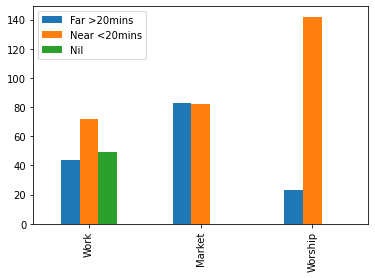

In [44]:
dist_measure_distr.sort_index().T.plot.bar()

### Effects of groove on residents Experiences

In [45]:
groove_bad_effect_distr = df['Bad Experience due to groove'].value_counts()

groove_bad_effect_distr

Yes    111
No      54
Name: Bad Experience due to groove, dtype: int64

Text(0, 0.5, 'Counts')

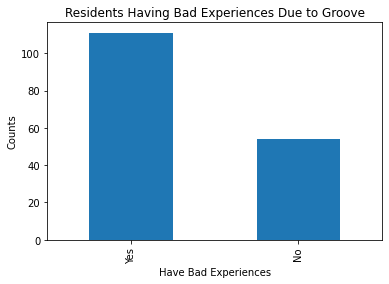

In [46]:
groove_bad_effect_distr.sort_values(ascending=False).plot.bar()
plt.title('Residents Having Bad Experiences Due to Groove')
plt.xlabel('Have Bad Experiences')
plt.ylabel('Counts')

### Nature of Insecurity Experienced due to Groove

In [47]:
# Moderating Nature of Insecurity Experienced column

b4 = df["Nature of Experien"].value_counts()
print('Before:')
print(b4)
print('\n\n')

# Changing all '0' values to 'Indifferent' for Nature of experience column
df['Nature of Experien'] = df['Nature of Experien'].map(lambda experience: 'Indifferent' if experience == 0 else experience)

after = df["Nature of Experien"].value_counts()
print('After:')
after

sec_issues = df['Nature of Experien'].value_counts()
sec_issues

Before:
Others(beating,robbery    83
0                         54
Rituals                   26
Kidnapping                 2
Name: Nature of Experien, dtype: int64



After:


Others(beating,robbery    83
Indifferent               54
Rituals                   26
Kidnapping                 2
Name: Nature of Experien, dtype: int64

Text(0, 0.5, 'Resident Counts')

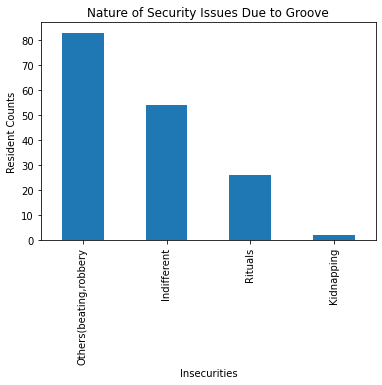

In [48]:
sec_issues.sort_values(ascending=False).T.plot.bar()
plt.title('Nature of Security Issues Due to Groove')
plt.xlabel('Insecurities')
plt.ylabel('Resident Counts')

# ENCODING CATEGORICAL STRING FEATURES

## Current Values in columns Before Encoding

In [49]:
get_unique_values_in_df(df=df)

1.) Respondent: 
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165.]

2.) DFCS: 
['200m' '400m' '600m' '800m']

3.) SEX: 
['M' 'F']

4.) Education: 
['<SSCE' 'SSCE' 'OND' 'HND' 'B.Sc' 'M.Sc/PhD']

5.) Annual Income

## Applying Custom Label Encoding to Some Columns

In [50]:
# Encoding DFCS as 1 for 100m, 2 -- 200m, 3 -- 300m, 6 -- 600m, etc
def encode_DFCS(val):
    return int(str(val)[0])

In [51]:
def encoding_Education(val):
    if val == '<SSCE': 
        return 0
    elif val == 'SSCE': 
        return 1
    elif val == 'OND': 
        return 2
    elif val == 'HND': 
        return 3
    elif val == 'B.Sc': 
        return 4
    elif val == 'M.Sc/PhD': 
        return 5
    else: 
        return 0

In [52]:
def encoding_Income(val):
    if val == '0k': 
        return 0
    elif val == '<100k': 
        return 1
    elif val == '101k-200k': 
        return 2
    elif val == '201k-300k': 
        return 3
    elif val == '301k-400k': 
        return 4
    elif val == '401k-500k': 
        return 5
    elif val == '>500k': 
        return 6

In [53]:
def encoding_building_age(val):
    if val == 'Very Old': 
        return 1
    if val == 'Old': 
        return 2
    elif 'Fairly Old': 
        return 3
    elif val == 'Fairly New': 
        return 4
    elif val == 'New': 
        return 5
    elif val == 'Very New': 
        return 6
    else: 
        return 0

In [54]:
def encoding_living_period(val):
    if val == '<5YRS': 
        return 1
    elif val == 'ABOVE 5YRS' or val == '>5YRS': 
        return 2
    else: 
        return 0

In [55]:
def encoding_rent(val):
    if val == '<50K': 
        return 1
    elif val == '50K-100K': 
        return 2
    elif val == '101K-200K': 
        return 3
    elif val == '201K-300K': 
        return 4
    elif val == '>300K': 
        return 5
    else: 
        return 0

In [56]:
def decode_rent(val):
    if val == 1: 
        return '<50K'
    elif val == 2: 
        return '50K-100K'
    elif val == 3: 
        return '101K-200K'
    elif val == 4: 
        return '201K-300K'
    elif val == 5: 
        return '>300K'
    else: 
        return '0K'

In [57]:
def encode_dist_to_work_worship_market(val):
    if val == 'Near <20mins': 
        return 1
    elif val == 'Far >20mins': 
        return 2
    else: 
        return 0

In [58]:
def encode_yes_no(val):
    if val.upper() == 'YES': 
        return 1
    else: 
        return 0

In [59]:
def encode_security_state(val):
    if val == 'Worse': 
        return 1
    elif val == 'Bad': 
        return 2
    elif val == 'Good': 
        return 3
    elif val == 'Very good': 
        return 4
    else: 
        return 0

In [60]:
def encode_good_bad(val):
    if val.upper() == 'GOOD': 
        return 1
    else:      # if 'Bad'
        return 0      

In [61]:
existing_cols = df.columns
existing_cols

Index(['Respondent', 'DFCS', 'SEX', 'Education', 'Annual Income',
       'House Types', 'Age of Bld', 'Period of living', 'State of Security',
       'State of Exterior', 'State of Interior', 'Rent p.a', 'Dist. to work',
       'Dist to place of worship', 'Dist to shopping', 'Avail. Of Electricty',
       'Avail. Of Water', 'Gd. Rd netwk', 'Avail of Area security',
       'Awareness of d groove', 'Awareness of gov regulation',
       'Bad Experience due to groove', 'Nature of Experien',
       'Attitude living close', 'Reason for living close',
       'Ready to relocate?', 'Why u wont build close to site', 'Employment'],
      dtype='object')

In [62]:
# Using the Custom-defined Label Encoders

df.DFCS = df.DFCS.map(encode_DFCS)
df.Education = df.Education.map(encoding_Education)
df['Annual Income'] = df['Annual Income'].map(encoding_Income)
df['Age of Bld'] = df['Age of Bld'].map(encoding_building_age)
df['Period of living'] = df['Period of living'].map(encoding_living_period)
df['State of Security'] = df['State of Security'].map(encode_security_state)
df['Rent p.a'] = df['Rent p.a'].map(encoding_rent)


dist_cols = ['Dist. to work', 'Dist to place of worship', 'Dist to shopping']
yes_no_cols = ['Avail. Of Electricty', 'Avail. Of Water', 'Gd. Rd netwk', 
               'Avail of Area security', 'Awareness of d groove', 
               'Awareness of gov regulation', 'Bad Experience due to groove', 'Ready to relocate?']

# Label encoding distance-measure-related columns
for col in dist_cols:
    df[col] = df[col].map(encode_dist_to_work_worship_market)

# Label encoding yes-No-related columns
for col in yes_no_cols:
    df[col] = df[col].map(encode_yes_no)


### After Applying Custom Label Encoders

In [63]:
get_unique_values_in_df(df=df, start_idx=1)

1.) DFCS: 
[2 4 6 8]

2.) SEX: 
['M' 'F']

3.) Education: 
[0 1 2 3 4 5]

4.) Annual Income: 
[1 0 4 5 3 6 2]

5.) House Types: 
['Tenement' 'Others' '3bedrm' '2bedrm']

6.) Age of Bld: 
[3 2 1]

7.) Period of living: 
[1 2]

8.) State of Security: 
[4 3 2 1]

9.) State of Exterior: 
['Good' 'Bad']

10.) State of Interior: 
['Good' 'Bad']

11.) Rent p.a: 
[5 2 1 3 4]

12.) Dist. to work: 
[2 0 1]

13.) Dist to place of worship: 
[2 1]

14.) Dist to shopping: 
[2 1]

15.) Avail. Of Electricty: 
[1]

16.) Avail. Of Water: 
[1 0]

17.) Gd. Rd netwk: 
[1 0]

18.) Avail of Area security: 
[1 0]

19.) Awareness of d groove: 
[1]

20.) Awareness of gov regulation: 
[1 0]

21.) Bad Experience due to groove: 
[1 0]

22.) Nature of Experien: 
['Rituals' 'Kidnapping' 'Others(beating,robbery' 'Indifferent']

23.) Attitude living close: 
['Comfortable' 'Not Comfortable' 'Indifferent']

24.) Reason for living close: 
['Low rent' 'Vaccancy possibility' 'Family House' 'No Reason']

25.) Ready to reloc

## Applying One Hot Encoding to remaining columns using pandas get_dummies()

In [70]:
cols_to_one_hot_encode = [
    'SEX', 'House Types', 'State of Exterior', 'State of Interior', 'Nature of Experien', 'Attitude living close', 'Reason for living close','Why u wont build close to site','Employment'
]

# Actual Encoding
df_new = get_dummies(df, columns=cols_to_one_hot_encode, drop_first=True)

In [72]:
print(f'Old Column Size (Before One-Hot-Encoding): {len(df.columns)}')
print(f'New Column Size (After One-Hot-Encoding): {len(df_new.columns)}')

Old Column Size (Before One-Hot-Encoding): 28
New Column Size (After One-Hot-Encoding): 40


In [73]:
df.columns

Index(['Respondent', 'DFCS', 'SEX', 'Education', 'Annual Income',
       'House Types', 'Age of Bld', 'Period of living', 'State of Security',
       'State of Exterior', 'State of Interior', 'Rent p.a', 'Dist. to work',
       'Dist to place of worship', 'Dist to shopping', 'Avail. Of Electricty',
       'Avail. Of Water', 'Gd. Rd netwk', 'Avail of Area security',
       'Awareness of d groove', 'Awareness of gov regulation',
       'Bad Experience due to groove', 'Nature of Experien',
       'Attitude living close', 'Reason for living close',
       'Ready to relocate?', 'Why u wont build close to site', 'Employment'],
      dtype='object')

In [74]:
df_new.columns

Index(['Respondent', 'DFCS', 'Education', 'Annual Income', 'Age of Bld',
       'Period of living', 'State of Security', 'Rent p.a', 'Dist. to work',
       'Dist to place of worship', 'Dist to shopping', 'Avail. Of Electricty',
       'Avail. Of Water', 'Gd. Rd netwk', 'Avail of Area security',
       'Awareness of d groove', 'Awareness of gov regulation',
       'Bad Experience due to groove', 'Ready to relocate?', 'SEX_M',
       'House Types_3bedrm', 'House Types_Others', 'House Types_Tenement',
       'State of Exterior_Good', 'State of Interior_Good',
       'Nature of Experien_Kidnapping',
       'Nature of Experien_Others(beating,robbery',
       'Nature of Experien_Rituals', 'Attitude living close_Indifferent',
       'Attitude living close_Not Comfortable',
       'Reason for living close_Low rent', 'Reason for living close_No Reason',
       'Reason for living close_Vaccancy possibility',
       'Why u wont build close to site_Env. Characteristics',
       'Why u wont build 

In [75]:
# Peeping Into New Dataset df
get_unique_values_in_df(df=df_new, start_idx=1)

1.) DFCS: 
[2 4 6 8]

2.) Education: 
[0 1 2 3 4 5]

3.) Annual Income: 
[1 0 4 5 3 6 2]

4.) Age of Bld: 
[3 2 1]

5.) Period of living: 
[1 2]

6.) State of Security: 
[4 3 2 1]

7.) Rent p.a: 
[5 2 1 3 4]

8.) Dist. to work: 
[2 0 1]

9.) Dist to place of worship: 
[2 1]

10.) Dist to shopping: 
[2 1]

11.) Avail. Of Electricty: 
[1]

12.) Avail. Of Water: 
[1 0]

13.) Gd. Rd netwk: 
[1 0]

14.) Avail of Area security: 
[1 0]

15.) Awareness of d groove: 
[1]

16.) Awareness of gov regulation: 
[1 0]

17.) Bad Experience due to groove: 
[1 0]

18.) Ready to relocate?: 
[1 0]

19.) SEX_M: 
[1 0]

20.) House Types_3bedrm: 
[0 1]

21.) House Types_Others: 
[0 1]

22.) House Types_Tenement: 
[1 0]

23.) State of Exterior_Good: 
[1 0]

24.) State of Interior_Good: 
[1 0]

25.) Nature of Experien_Kidnapping: 
[0 1]

26.) Nature of Experien_Others(beating,robbery: 
[0 1]

27.) Nature of Experien_Rituals: 
[1 0]

28.) Attitude living close_Indifferent: 
[0 1]

29.) Attitude living close_Not

In [76]:
# Converting the Respondent ID column from floating point into integer, to be used as index column

df_new.Respondent = df_new.Respondent.astype('int32')
df_new.head()

,Respondent,DFCS,Education,Annual Income,Age of Bld,Period of living,State of Security,Rent p.a,Dist. to work,Dist to place of worship,...,Reason for living close_Low rent,Reason for living close_No Reason,Reason for living close_Vaccancy possibility,Why u wont build close to site_Env. Characteristics,Why u wont build close to site_Infrastructural Fcailities,Why u wont build close to site_Religious rites,Why u wont build close to site_low rent,Employment_pd employment,Employment_retired,Employment_self employed
0,1,2,0,1,3,1,4,5,2,2,...,1,0,0,0,0,1,0,1,0,0
1,2,2,0,1,3,1,4,5,2,2,...,1,0,0,0,0,1,0,1,0,0
2,3,2,0,1,3,1,4,5,2,2,...,1,0,0,0,0,1,0,1,0,0
3,4,2,0,1,3,1,4,5,2,2,...,1,0,0,0,0,0,0,1,0,0
4,5,2,0,1,3,1,4,5,2,2,...,1,0,0,0,0,0,0,1,0,0


## Saving A copy of the Cleaned Pre-processed Dataset

In [77]:
df_new.to_csv('dataset/cleaned_housing_dataset.csv', index=False)

## Loading the Cleaned Dataset

In [78]:
df_new = pd.read_csv('dataset/cleaned_housing_dataset.csv', index_col=0)
df_new.head()

,DFCS,Education,Annual Income,Age of Bld,Period of living,State of Security,Rent p.a,Dist. to work,Dist to place of worship,Dist to shopping,...,Reason for living close_Low rent,Reason for living close_No Reason,Reason for living close_Vaccancy possibility,Why u wont build close to site_Env. Characteristics,Why u wont build close to site_Infrastructural Fcailities,Why u wont build close to site_Religious rites,Why u wont build close to site_low rent,Employment_pd employment,Employment_retired,Employment_self employed
Respondent,,,,,,,,,,,,,,,,,,,,,
1,2,0,1,3,1,4,5,2,2,2,...,1,0,0,0,0,1,0,1,0,0
2,2,0,1,3,1,4,5,2,2,2,...,1,0,0,0,0,1,0,1,0,0
3,2,0,1,3,1,4,5,2,2,2,...,1,0,0,0,0,1,0,1,0,0
4,2,0,1,3,1,4,5,2,2,2,...,1,0,0,0,0,0,0,1,0,0
5,2,0,1,3,1,4,5,2,2,2,...,1,0,0,0,0,0,0,1,0,0


# DATASET SPLITTING

## Separating the Features (Independent variables) from the label (dependent/target variable) 

In [79]:
X = df_new.drop(columns='Rent p.a')
y = df_new['Rent p.a']

## Splitting the Dataset into Training and Testing Set

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# FEATURE SELECTION 

Features are selected based on 'Feature Importances', obtained with the use of Decision Tree

In [81]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Temporary Predictions
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.9090909090909091


## Estimating Feature Importances to 'Rent' (Target variable)

In [82]:
dt.feature_importances_

array([0.22810483, 0.25418685, 0.0707811 , 0.        , 0.        ,
       0.01799738, 0.00399942, 0.        , 0.        , 0.        ,
       0.01799738, 0.02666279, 0.01199825, 0.        , 0.        ,
       0.02858408, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05999127, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.150902  , 0.        , 0.10871913,
       0.        , 0.02007551, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [83]:
feat_imp = pd.DataFrame(dt.feature_importances_, index=X_test.columns, columns=['Feature_Importances'])
feat_imp = feat_imp.sort_values(by='Feature_Importances', ascending=False)
feat_imp

,Feature_Importances
Education,0.254187
DFCS,0.228105
Attitude living close_Not Comfortable,0.150902
Reason for living close_No Reason,0.108719
Annual Income,0.070781
State of Exterior_Good,0.059991
Bad Experience due to groove,0.028584
Gd. Rd netwk,0.026663
Why u wont build close to site_Env. Characteristics,0.020076
Avail. Of Water,0.017997


<AxesSubplot:>

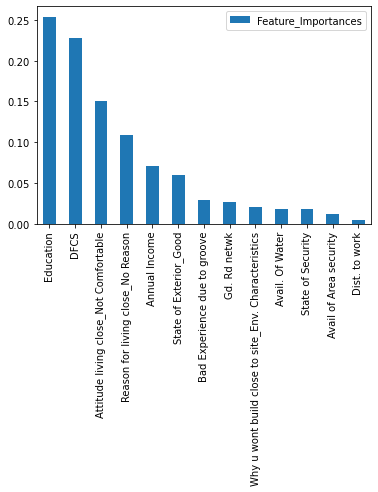

In [84]:
feat_imp[feat_imp.Feature_Importances > 0].plot.bar()

In [85]:
imptt_cols = feat_imp[feat_imp.Feature_Importances > 0].index.to_list()
imptt_cols

['Education',
 'DFCS',
 'Attitude living close_Not Comfortable',
 'Reason for living close_No Reason',
 'Annual Income',
 'State of Exterior_Good',
 'Bad Experience due to groove',
 'Gd. Rd netwk',
 'Why u wont build close to site_Env. Characteristics',
 'Avail. Of Water',
 'State of Security',
 'Avail of Area security',
 'Dist. to work']

In [86]:
df_selected_features = pd.concat([df_new[imptt_cols], df_new['Rent p.a']], axis='columns')
df_selected_features.head(3)

,Education,DFCS,Attitude living close_Not Comfortable,Reason for living close_No Reason,Annual Income,State of Exterior_Good,Bad Experience due to groove,Gd. Rd netwk,Why u wont build close to site_Env. Characteristics,Avail. Of Water,State of Security,Avail of Area security,Dist. to work,Rent p.a
Respondent,,,,,,,,,,,,,,
1,0,2,0,0,1,1,1,1,0,1,4,1,2,5
2,0,2,0,0,1,1,1,1,0,1,4,1,2,5
3,0,2,0,0,1,1,1,1,0,1,4,1,2,5


In [87]:
df_selected_features.shape

(165, 14)

In [93]:
# Saving a copy of Selected Features Dataset
df_selected_features.to_csv('dataset/selected_features_dataset.csv')
print('Saved.')

Saved.


### Separating Features from Label

In [89]:
X = df_selected_features.drop(columns='Rent p.a')
y = df_selected_features['Rent p.a']

## Scaling

In [265]:
# scale = MinMaxScaler()
# X_scaled = scale.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
# X_scaled

# Spliting into Train and Test Set 
33% Test set, 67% Train set 

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [264]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (110, 13)
y_train: (110,)
X_test: (55, 13)
y_test: (55,)


# MODEL BUILDING

In [144]:
def plot_confusion_matrix(cfm, title='Heatmap of Confusion Matrix'):
    """
        PLots a heatmap of the confusion matrix
    """ 
    xyticks = list(np.array(list(range(cfm.shape[0]))) + .5)
    
    print(title+ '\n')
    print(cfm)
    print()
    sns.heatmap(cfm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=xyticks, labels=['<50K', '50K-100K', '101K-200K', '201K-300K', '>300K'])
    plt.yticks(ticks=xyticks, labels=['<50K', '50K-100K', '101K-200K', '201K-300K', '>300K'])

In [127]:
def save_model(model, filename):
    """
        Saves a trained model to 'Trained Model/<filename>'
    """
    pickle.dump(rf, open(f'Trained Models/{filename}', 'wb'))
    print('saved.')

In [128]:
def load_model(filename):
    """
        Loads a trained model from 'Trained Model/<filename>'
    """
    return pickle.load(open(f'Trained Models/{filename}', 'rb'))

In [259]:
def compare_predictions(true_val, predicted_val):
    predictions = {'true_rent': true_val.map(decode_rent), 
                   'predicted_rent': pd.Series(predicted_val, index=true_val.index)
                   .map(decode_rent)}
    return pd.DataFrame(predictions, index=y_test.index)

# Random Forest Classifiers

## 1. Random Forest

In [98]:
## Initialization
rf = None
rf = RandomForestClassifier(n_estimators=40, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='auto')

In [99]:
## Training

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [100]:
## Prediction

rf_pred = rf.predict(X_test)

In [263]:
# Compare Predictions vs True Value
compare_predictions(y_test, rf_pred)[:15]

,true_rent,predicted_rent
Respondent,,
136,50K-100K,50K-100K
116,201K-300K,201K-300K
132,50K-100K,50K-100K
56,<50K,<50K
96,50K-100K,50K-100K
30,50K-100K,50K-100K
159,101K-200K,101K-200K
52,<50K,<50K
102,101K-200K,50K-100K


### Performance Evaluations

In [101]:
rf_metrics = [
    round(accuracy_score(y_test, rf_pred),2),
    round(precision_score(y_test, rf_pred, average='macro'),2),
    round(recall_score(y_test, rf_pred, average='macro'),2),
#     round(roc_auc_score(y_test, rf_pred, average='macro', multi_class='ovo'),2),
    round(f1_score(y_test, rf_pred, average='macro'),2),
    round(r2_score(y_test, rf_pred),2)
]

rf_dico_results = pd.DataFrame(data=rf_metrics, columns=['rf_pred'], index=METRICS)
rf_dico_results

,rf_pred
accuracy,0.95
precision,0.96
recall,0.89
f_measure,0.92
r2,0.97


In [102]:
# Classification Report

print(f'Classification Report RF\n------------------------')
print(classification_report(y_test, rf_pred))

Classification Report RF
------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.92      1.00      0.96        22
           3       0.89      0.80      0.84        10
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00        12

    accuracy                           0.95        55
   macro avg       0.96      0.89      0.92        55
weighted avg       0.95      0.95      0.94        55



Confusion Matrix for Random Forest

[[ 8  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  2  8  0  0]
 [ 0  0  1  2  0]
 [ 0  0  0  0 12]]



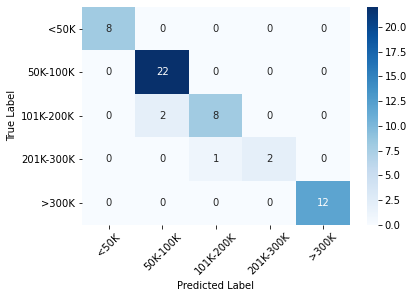

In [145]:
# Confusion Matrix
plot_confusion_matrix(confusion_matrix(y_test, rf_pred), 'Confusion Matrix for Random Forest')

In [129]:
# Saving the trained model
save_model(model=rf, filename='rf_model.sav')

saved.


## 2. Random Forest with GridSearchCV, with 5-fold Cross Validation

In [135]:
rf_params = {'n_estimators':list(range(25, 100, 5)), 'criterion':['gini', 'entropy']}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [25, 30, 35, 40, 45, 50, 55, 60, 65,
                                          70, 75, 80, 85, 90, 95]},
             scoring='accuracy')

In [136]:
rf_grid.best_params_

{'criterion': 'gini', 'n_estimators': 35}

In [137]:
rf_grid_pred = rf_grid.predict(X_test)

In [266]:
# Compare Predictions vs True Value
compare_predictions(y_test, rf_grid_pred)[:15]

,true_rent,predicted_rent
Respondent,,
136,50K-100K,50K-100K
116,201K-300K,201K-300K
132,50K-100K,50K-100K
56,<50K,<50K
96,50K-100K,50K-100K
30,50K-100K,50K-100K
159,101K-200K,101K-200K
52,<50K,<50K
102,101K-200K,101K-200K


In [138]:
rf_grid_metrics = [
    round(accuracy_score(y_test, rf_grid_pred),2),
    round(precision_score(y_test, rf_grid_pred, average='macro'),2),
    round(recall_score(y_test, rf_grid_pred, average='macro'),2),
#     round(roc_auc_score(y_test, rf_grid_pred, average='macro', multi_class='ovo'),2),
    round(f1_score(y_test, rf_grid_pred, average='macro'),2),
    round(r2_score(y_test, rf_grid_pred),2)
]

rf_grid_dico_results = pd.DataFrame(data=rf_grid_metrics, columns=['rf_grid_pred'], index=METRICS)
rf_grid_dico_results

,rf_grid_pred
accuracy,0.96
precision,0.97
recall,0.91
f_measure,0.94
r2,0.98


In [146]:
# Classification Report

print(f'Classification Report RF+GridSearch\n-----------------------------------')
print(classification_report(y_test, rf_grid_pred))

Classification Report RF+GridSearch
-----------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.96      1.00      0.98        22
           3       0.90      0.90      0.90        10
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00        12

    accuracy                           0.96        55
   macro avg       0.97      0.91      0.94        55
weighted avg       0.96      0.96      0.96        55



Confusion Matrix for (RF + GridSearchCV)

[[ 8  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  1  9  0  0]
 [ 0  0  1  2  0]
 [ 0  0  0  0 12]]



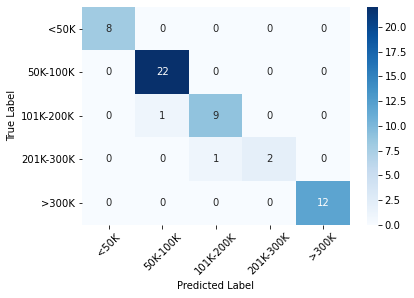

In [147]:
plot_confusion_matrix(confusion_matrix(y_test, rf_grid_pred), title='Confusion Matrix for (RF + GridSearchCV)')

In [151]:
# Saving a copy of the RF+Grid trained model
save_model(model=rf_grid, filename='rf_grid_model.sav')

saved.


## RF Combined Results

In [149]:
rf_combined_results = pd.concat([rf_dico_results, rf_grid_dico_results], axis='columns')
rf_combined_results

,rf_pred,rf_grid_pred
accuracy,0.95,0.96
precision,0.96,0.97
recall,0.89,0.91
f_measure,0.92,0.94
r2,0.97,0.98


In [150]:
# Saving a copy of the random forest model's results
rf_combined_results.to_csv('Results/rf_combined_results.csv') 

# SUPPORT VECTOR CLASSIFIER (SVC)

In [162]:
# Initialization
del svc
svc = SVC(C=1.0, gamma='scale', probability=True)

In [163]:
# Training

svc.fit(X_train, y_train)

SVC(probability=True)

In [164]:
# Predictions

svc_pred = svc.predict(X_test)

In [267]:
# Compare Predictions vs True Value
compare_predictions(y_test, svc_pred)[:15]

,true_rent,predicted_rent
Respondent,,
136,50K-100K,50K-100K
116,201K-300K,201K-300K
132,50K-100K,50K-100K
56,<50K,<50K
96,50K-100K,50K-100K
30,50K-100K,50K-100K
159,101K-200K,101K-200K
52,<50K,<50K
102,101K-200K,101K-200K


## SVC Evaluations

In [165]:
svc_metrics = [
    round(accuracy_score(y_test, svc_pred),2),
    round(precision_score(y_test, svc_pred, average='macro'),2),
    round(recall_score(y_test, svc_pred, average='macro'),2),
#     round(roc_auc_score(y_test, svc_pred, average='macro', multi_class='ovo'),2),
    round(f1_score(y_test, svc_pred, average='macro'),2),
    round(r2_score(y_test, svc_pred),2)
]

svc_dico_results = pd.DataFrame(data=svc_metrics, columns=['svc_pred'], index=METRICS)
svc_dico_results

,svc_pred
accuracy,0.93
precision,0.94
recall,0.89
f_measure,0.91
r2,0.88


In [166]:
# Classification Report

print(f'Classification Report SVC\n---------------------------')
print(classification_report(y_test, svc_pred))

Classification Report SVC
---------------------------
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       0.91      0.95      0.93        22
           3       0.90      0.90      0.90        10
           4       1.00      0.67      0.80         3
           5       1.00      0.92      0.96        12

    accuracy                           0.93        55
   macro avg       0.94      0.89      0.91        55
weighted avg       0.93      0.93      0.93        55



Confusion Matrix for SVC

[[ 8  0  0  0  0]
 [ 1 21  0  0  0]
 [ 0  1  9  0  0]
 [ 0  0  1  2  0]
 [ 0  1  0  0 11]]



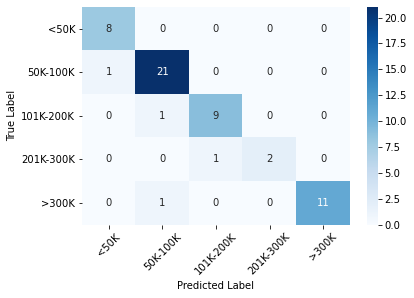

In [167]:
plot_confusion_matrix(confusion_matrix(y_test, svc_pred), title='Confusion Matrix for SVC')

In [168]:
# Saving the trained model
save_model(model=svc, filename='svc_model.sav')

saved.


# SVC WITH GRIDSEARCHCV 

In [169]:
svc_params = {'C':list(range(1, 100, 5)), 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,'scale']}
svc_grid = GridSearchCV(SVC(), param_grid=svc_params, scoring='accuracy', cv=5)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 'scale']},
             scoring='accuracy')

In [170]:
svc_grid.best_params_

{'C': 46, 'gamma': 'scale'}

In [171]:
svc_grid_pred = svc_grid.predict(X_test)

In [268]:
# Compare Predictions vs True Value
compare_predictions(y_test, svc_grid_pred)[:15]

,true_rent,predicted_rent
Respondent,,
136,50K-100K,50K-100K
116,201K-300K,201K-300K
132,50K-100K,50K-100K
56,<50K,<50K
96,50K-100K,50K-100K
30,50K-100K,50K-100K
159,101K-200K,101K-200K
52,<50K,<50K
102,101K-200K,50K-100K


In [173]:
svc_grid_metrics = [
    round(accuracy_score(y_test, svc_grid_pred),2),
    round(precision_score(y_test, svc_grid_pred, average='macro'),2),
    round(recall_score(y_test, svc_grid_pred, average='macro'),2),
#     round(roc_auc_score(y_test, svc_grid_pred, average='macro', multi_class='ovo'),2),
    round(f1_score(y_test, svc_grid_pred, average='macro'),2),
    round(r2_score(y_test, svc_grid_pred),2)
]

svc_grid_dico_results = pd.DataFrame(data=svc_grid_metrics, columns=['svc_grid_pred'], index=METRICS)
svc_grid_dico_results

,svc_grid_pred
accuracy,0.95
precision,0.96
recall,0.89
f_measure,0.92
r2,0.97


In [174]:
# Classification Report

print(f'Classification Report SVC+GridSearch\n-------------------------------')
print(classification_report(y_test, svc_grid_pred))

Classification Report SVC+GridSearch
-------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.92      1.00      0.96        22
           3       0.89      0.80      0.84        10
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00        12

    accuracy                           0.95        55
   macro avg       0.96      0.89      0.92        55
weighted avg       0.95      0.95      0.94        55



Confusion Matrix for (SVC + GridSearchCV)

[[ 8  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  2  8  0  0]
 [ 0  0  1  2  0]
 [ 0  0  0  0 12]]



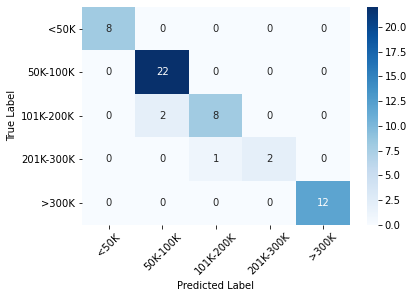

In [175]:
# Confusion Matrix
plot_confusion_matrix(confusion_matrix(y_test, svc_grid_pred), title='Confusion Matrix for (SVC + GridSearchCV)')

In [176]:
# Saving the trained model
save_model(model=svc_grid, filename='svc_grid_model.sav')

saved.


## Combined SVC Results

In [177]:
svc_combined_results = pd.concat([svc_dico_results, svc_grid_dico_results], axis='columns')
svc_combined_results

,svc_pred,svc_grid_pred
accuracy,0.93,0.95
precision,0.94,0.96
recall,0.89,0.89
f_measure,0.91,0.92
r2,0.88,0.97


In [178]:
# Saving a copy of svc models' results
svc_combined_results.to_csv('Results/svc_combined_results.csv')

# CATBOOST

## 1. CatBoost Only

In [188]:
# Initializations

cb = CatBoostClassifier(iterations=12, learning_rate=0.1, depth=2)

In [189]:
# Training

train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(X_test)

cb.fit(train_pool)

0:	learn: 1.5337116	total: 887us	remaining: 9.76ms
1:	learn: 1.4314079	total: 1.91ms	remaining: 9.53ms
2:	learn: 1.3856692	total: 2.74ms	remaining: 8.23ms
3:	learn: 1.3398184	total: 3.58ms	remaining: 7.15ms
4:	learn: 1.2838810	total: 4.32ms	remaining: 6.04ms
5:	learn: 1.2422588	total: 5.1ms	remaining: 5.1ms
6:	learn: 1.1868838	total: 5.87ms	remaining: 4.19ms
7:	learn: 1.1279662	total: 6.6ms	remaining: 3.3ms
8:	learn: 1.1101042	total: 7.3ms	remaining: 2.43ms
9:	learn: 1.0734396	total: 8.01ms	remaining: 1.6ms
10:	learn: 1.0399097	total: 8.77ms	remaining: 796us
11:	learn: 1.0155069	total: 9.48ms	remaining: 0us


In [190]:
# Predictions

cb_pred = cb.predict(test_pool)

In [276]:
# Compare Predictions vs True Value
compare_predictions(y_test, cb_pred[:,0])[:15]

,true_rent,predicted_rent
Respondent,,
136,50K-100K,50K-100K
116,201K-300K,101K-200K
132,50K-100K,50K-100K
56,<50K,<50K
96,50K-100K,50K-100K
30,50K-100K,50K-100K
159,101K-200K,101K-200K
52,<50K,<50K
102,101K-200K,101K-200K


## Catboost Evaluations

In [191]:
cb_metrics = [
    round(accuracy_score(y_test, cb_pred),2),
    round(precision_score(y_test, cb_pred, average='weighted'),2),
    round(recall_score(y_test, cb_pred, average='weighted'),2),
#     round(roc_auc_score(y_test, cb_pred, average='macro', multi_class='ovo'),2),
    round(f1_score(y_test, cb_pred, average='weighted'),2),
    round(r2_score(y_test, cb_pred),2)
]

cb_dico_results = pd.DataFrame(data=cb_metrics, columns=['cb_pred'], index=METRICS)
cb_dico_results

/Users/Air/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,cb_pred
accuracy,0.87
precision,0.83
recall,0.87
f_measure,0.85
r2,0.85


In [192]:
# Classification Report

print(f'Classification Report CB\n------------------------')
print(classification_report(y_test, cb_pred))

Classification Report CB
------------------------
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.88      0.95      0.91        22
           3       0.75      0.90      0.82        10
           4       0.00      0.00      0.00         3
           5       1.00      0.92      0.96        12

    accuracy                           0.87        55
   macro avg       0.70      0.73      0.71        55
weighted avg       0.83      0.87      0.85        55



/Users/Air/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for CatBoost

[[ 7  1  0  0  0]
 [ 1 21  0  0  0]
 [ 0  1  9  0  0]
 [ 0  0  3  0  0]
 [ 0  1  0  0 11]]



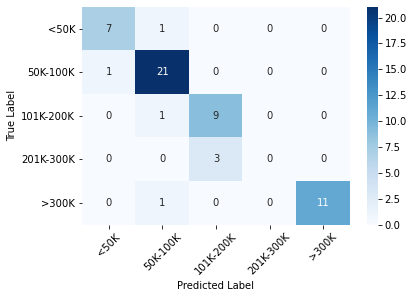

In [193]:
plot_confusion_matrix(confusion_matrix(y_test, cb_pred), title='Confusion Matrix for CatBoost')

In [194]:
# Saving the trained model
save_model(model=cb, filename='cb_model.sav')

saved.


## 2. CatBoost + GridSearchCV

In [202]:
del cb_grid

In [203]:
# Initializations

cb_grid_params = {'learning_rate': [0.03, 0.01, 0.1], 
                  'depth': [2, 4, 6, 8, 10], 
                  'l2_leaf_reg': [1,3,5,7,9], 
                  'iterations': [10, 20, 30, 40, 50]}

cb_grid = CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy')

In [204]:
# Training the model

cb_grid.grid_search(cb_grid_params, train_pool, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4545455	test: 0.2727273	best: 0.2727273 (0)	total: 717us	remaining: 6.46ms
1:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 1.76ms	remaining: 7.05ms
2:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 2.65ms	remaining: 6.19ms
3:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 3.56ms	remaining: 5.33ms
4:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 4.42ms	remaining: 4.42ms
5:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 5.37ms	remaining: 3.58ms
6:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 6.31ms	remaining: 2.7ms
7:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 7.2ms	remaining: 1.8ms
8:	learn: 0.6931818	test: 0.4545455	best: 0.4545455 (1)	total: 8.07ms	remaining: 896us
9:	learn: 0.6590909	test: 0.4090909	best: 0.4545455 (1)	total: 9.12ms	remaining: 0us

bestTest = 0.4545454545
bestIteration = 1

0:	learn: 0.4545455	test: 0.2727273	best: 0.2727273 (0)	total: 705us	remaining: 6.35

6:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 6.98ms	remaining: 13ms
7:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 8.33ms	remaining: 12.5ms
8:	learn: 0.6931818	test: 0.4545455	best: 0.4545455 (1)	total: 9.7ms	remaining: 11.8ms
9:	learn: 0.6590909	test: 0.4090909	best: 0.4545455 (1)	total: 11.4ms	remaining: 11.4ms
10:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 12.4ms	remaining: 10.2ms
11:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 13.3ms	remaining: 8.89ms
12:	learn: 0.6590909	test: 0.5000000	best: 0.5000000 (12)	total: 14.2ms	remaining: 7.65ms
13:	learn: 0.6704545	test: 0.5000000	best: 0.5000000 (12)	total: 15.1ms	remaining: 6.47ms
14:	learn: 0.6818182	test: 0.5454545	best: 0.5454545 (14)	total: 16ms	remaining: 5.32ms
15:	learn: 0.6704545	test: 0.5454545	best: 0.5454545 (14)	total: 16.8ms	remaining: 4.2ms
16:	learn: 0.7386364	test: 0.5454545	best: 0.5454545 (14)	total: 17.7ms	remaining: 3.12ms
17:	learn: 0.7840909	test:


bestTest = 0.7727272727
bestIteration = 18

0:	learn: 0.4545455	test: 0.2727273	best: 0.2727273 (0)	total: 773us	remaining: 14.7ms
1:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 1.79ms	remaining: 16.1ms
2:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 3.67ms	remaining: 20.8ms
3:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 9.22ms	remaining: 36.9ms
4:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 12ms	remaining: 36.1ms
5:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 13.3ms	remaining: 31ms
6:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 14.3ms	remaining: 26.5ms
7:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 25.6ms	remaining: 38.3ms
8:	learn: 0.6704545	test: 0.5454545	best: 0.5454545 (8)	total: 26.9ms	remaining: 32.9ms
9:	learn: 0.6818182	test: 0.5454545	best: 0.5454545 (8)	total: 28.2ms	remaining: 28.2ms
10:	learn: 0.7045455	test: 0.5909091	best: 0.5909091 (10)	total: 30.4ms	remainin

1:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 2.31ms	remaining: 32.4ms
2:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 3.74ms	remaining: 33.7ms
3:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 5ms	remaining: 32.5ms
4:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 5.86ms	remaining: 29.3ms
5:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 6.69ms	remaining: 26.8ms
6:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 7.45ms	remaining: 24.5ms
7:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 8.26ms	remaining: 22.7ms
8:	learn: 0.6931818	test: 0.4545455	best: 0.4545455 (1)	total: 9.01ms	remaining: 21ms
9:	learn: 0.6590909	test: 0.4090909	best: 0.4545455 (1)	total: 9.8ms	remaining: 19.6ms
10:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 10.7ms	remaining: 18.5ms
11:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 11.5ms	remaining: 17.2ms
12:	learn: 0.6590909	test: 0.5000000

13:	learn: 0.8636364	test: 0.6363636	best: 0.8181818 (10)	total: 11.5ms	remaining: 13.1ms
14:	learn: 0.9090909	test: 0.6818182	best: 0.8181818 (10)	total: 12.6ms	remaining: 12.6ms
15:	learn: 0.8636364	test: 0.6363636	best: 0.8181818 (10)	total: 14.3ms	remaining: 12.6ms
16:	learn: 0.8750000	test: 0.6818182	best: 0.8181818 (10)	total: 15.4ms	remaining: 11.8ms
17:	learn: 0.9090909	test: 0.6818182	best: 0.8181818 (10)	total: 17ms	remaining: 11.4ms
18:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (10)	total: 18.6ms	remaining: 10.8ms
19:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (10)	total: 19.9ms	remaining: 9.95ms
20:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (10)	total: 21.3ms	remaining: 9.12ms
21:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (10)	total: 22.1ms	remaining: 8.03ms
22:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (10)	total: 23ms	remaining: 6.99ms
23:	learn: 0.9204545	test: 0.7727273	best: 0.8181818 (10)	total: 23.9ms	remaining: 5.99ms
24:	learn: 0.9

20:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 23.9ms	remaining: 10.3ms
21:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 25ms	remaining: 9.1ms
22:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 26.8ms	remaining: 8.16ms
23:	learn: 0.8522727	test: 0.7272727	best: 0.7272727 (19)	total: 27.5ms	remaining: 6.89ms
24:	learn: 0.8181818	test: 0.7272727	best: 0.7272727 (19)	total: 28.3ms	remaining: 5.66ms
25:	learn: 0.8181818	test: 0.7272727	best: 0.7272727 (19)	total: 29.6ms	remaining: 4.55ms
26:	learn: 0.8522727	test: 0.7272727	best: 0.7272727 (19)	total: 30.9ms	remaining: 3.44ms
27:	learn: 0.8295455	test: 0.7272727	best: 0.7272727 (19)	total: 31.8ms	remaining: 2.27ms
28:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 32.6ms	remaining: 1.12ms
29:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 34.7ms	remaining: 0us

bestTest = 0.7272727273
bestIteration = 19

0:	learn: 0.4545455	test: 0.2727273	best: 0.2727273 (0)	total

27:	learn: 0.8295455	test: 0.7272727	best: 0.7272727 (19)	total: 27.7ms	remaining: 3.07ms
28:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 27.7ms	remaining: 3.07ms
29:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 28.7ms	remaining: 0us

bestTest = 0.7272727273
bestIteration = 19

0:	learn: 0.4545455	test: 0.2727273	best: 0.2727273 (0)	total: 740us	remaining: 21.5ms
1:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 1.68ms	remaining: 23.5ms
2:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 2.59ms	remaining: 23.3ms
3:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 3.46ms	remaining: 22.5ms
4:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 4.34ms	remaining: 21.7ms
5:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 5.16ms	remaining: 20.6ms
6:	learn: 0.6931818	test: 0.4545455	best: 0.4545455 (1)	total: 6.02ms	remaining: 19.8ms
7:	learn: 0.7272727	test: 0.4545455	best: 0.4545455 (1)	total: 6.89ms	rem

20:	learn: 0.8636364	test: 0.6818182	best: 0.6818182 (20)	total: 40.2ms	remaining: 36.3ms
21:	learn: 0.8636364	test: 0.6818182	best: 0.6818182 (20)	total: 43.6ms	remaining: 35.7ms
22:	learn: 0.8636364	test: 0.6818182	best: 0.6818182 (20)	total: 44.4ms	remaining: 32.8ms
23:	learn: 0.8636364	test: 0.6818182	best: 0.6818182 (20)	total: 45.2ms	remaining: 30.2ms
24:	learn: 0.8636364	test: 0.6818182	best: 0.6818182 (20)	total: 46.1ms	remaining: 27.6ms
25:	learn: 0.8636364	test: 0.6818182	best: 0.6818182 (20)	total: 48.7ms	remaining: 26.2ms
26:	learn: 0.8295455	test: 0.6818182	best: 0.6818182 (20)	total: 51.5ms	remaining: 24.8ms
27:	learn: 0.8750000	test: 0.8181818	best: 0.8181818 (27)	total: 52.4ms	remaining: 22.5ms
28:	learn: 0.8522727	test: 0.7272727	best: 0.8181818 (27)	total: 53.2ms	remaining: 20.2ms
29:	learn: 0.8068182	test: 0.7272727	best: 0.8181818 (27)	total: 53.9ms	remaining: 18ms
30:	learn: 0.8068182	test: 0.6818182	best: 0.8181818 (27)	total: 54.8ms	remaining: 15.9ms
31:	learn: 0

0:	learn: 0.4545455	test: 0.2727273	best: 0.2727273 (0)	total: 1.33ms	remaining: 52ms
1:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 2.28ms	remaining: 43.3ms
2:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 3.15ms	remaining: 38.9ms
3:	learn: 0.6704545	test: 0.4545455	best: 0.4545455 (1)	total: 4.83ms	remaining: 43.5ms
4:	learn: 0.6704545	test: 0.5454545	best: 0.5454545 (4)	total: 5.66ms	remaining: 39.6ms
5:	learn: 0.6818182	test: 0.5454545	best: 0.5454545 (4)	total: 6.62ms	remaining: 37.5ms
6:	learn: 0.7159091	test: 0.5454545	best: 0.5454545 (4)	total: 7.49ms	remaining: 35.3ms
7:	learn: 0.7727273	test: 0.5454545	best: 0.5454545 (4)	total: 8.3ms	remaining: 33.2ms
8:	learn: 0.7613636	test: 0.5909091	best: 0.5909091 (8)	total: 9.13ms	remaining: 31.4ms
9:	learn: 0.7500000	test: 0.6818182	best: 0.6818182 (9)	total: 9.94ms	remaining: 29.8ms
10:	learn: 0.7500000	test: 0.6818182	best: 0.6818182 (9)	total: 10.8ms	remaining: 28.4ms
11:	learn: 0.7840909	test: 0.68181

35:	learn: 0.7954545	test: 0.6818182	best: 0.7272727 (19)	total: 28.2ms	remaining: 3.13ms
36:	learn: 0.7954545	test: 0.6818182	best: 0.7272727 (19)	total: 29.1ms	remaining: 2.36ms
37:	learn: 0.7954545	test: 0.6818182	best: 0.7272727 (19)	total: 30.1ms	remaining: 1.58ms
38:	learn: 0.7954545	test: 0.6818182	best: 0.7272727 (19)	total: 31.1ms	remaining: 797us
39:	learn: 0.7954545	test: 0.6818182	best: 0.7272727 (19)	total: 32.2ms	remaining: 0us

bestTest = 0.7272727273
bestIteration = 19

0:	learn: 0.4545455	test: 0.2727273	best: 0.2727273 (0)	total: 715us	remaining: 27.9ms
1:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 1.74ms	remaining: 33ms
2:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 2.66ms	remaining: 32.9ms
3:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 3.53ms	remaining: 31.8ms
4:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 4.39ms	remaining: 30.7ms
5:	learn: 0.6818182	test: 0.4545455	best: 0.4545455 (1)	total: 5.29ms	re

18:	learn: 0.9090909	test: 0.7727273	best: 0.9090909 (9)	total: 14.8ms	remaining: 24.2ms
19:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 15.9ms	remaining: 23.8ms
20:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 16.8ms	remaining: 23.1ms
21:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 18.1ms	remaining: 23ms
22:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 19.2ms	remaining: 22.5ms
23:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 20.1ms	remaining: 21.8ms
24:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 21ms	remaining: 21ms
25:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 21.9ms	remaining: 20.2ms
26:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 22.7ms	remaining: 19.4ms
27:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 23.6ms	remaining: 18.5ms
28:	learn: 0.9431818	test: 0.7727273	best: 0.9090909 (9)	total: 24.4ms	remaining: 17.7ms
29:	learn: 0.9431818	test: 

23:	learn: 0.8750000	test: 0.8181818	best: 0.8181818 (23)	total: 17.9ms	remaining: 19.4ms
24:	learn: 0.8636364	test: 0.6818182	best: 0.8181818 (23)	total: 19.1ms	remaining: 19.1ms
25:	learn: 0.8295455	test: 0.5909091	best: 0.8181818 (23)	total: 20ms	remaining: 18.4ms
26:	learn: 0.7954545	test: 0.5909091	best: 0.8181818 (23)	total: 21ms	remaining: 17.8ms
27:	learn: 0.8409091	test: 0.7272727	best: 0.8181818 (23)	total: 22.4ms	remaining: 17.6ms
28:	learn: 0.8409091	test: 0.7272727	best: 0.8181818 (23)	total: 23.4ms	remaining: 16.9ms
29:	learn: 0.8295455	test: 0.7272727	best: 0.8181818 (23)	total: 24.3ms	remaining: 16.2ms
30:	learn: 0.8068182	test: 0.6818182	best: 0.8181818 (23)	total: 25.2ms	remaining: 15.4ms
31:	learn: 0.8522727	test: 0.6818182	best: 0.8181818 (23)	total: 26.1ms	remaining: 14.7ms
32:	learn: 0.8409091	test: 0.6818182	best: 0.8181818 (23)	total: 26.9ms	remaining: 13.9ms
33:	learn: 0.8636364	test: 0.7727273	best: 0.8181818 (23)	total: 27.9ms	remaining: 13.1ms
34:	learn: 0.8

16:	learn: 0.7045455	test: 0.5454545	best: 0.5454545 (10)	total: 13ms	remaining: 25.2ms
17:	learn: 0.7613636	test: 0.5454545	best: 0.5454545 (10)	total: 14ms	remaining: 24.8ms
18:	learn: 0.7500000	test: 0.5454545	best: 0.5454545 (10)	total: 14.8ms	remaining: 24.1ms
19:	learn: 0.8181818	test: 0.7272727	best: 0.7272727 (19)	total: 15.7ms	remaining: 23.6ms
20:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 17.1ms	remaining: 23.6ms
21:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 17.9ms	remaining: 22.8ms
22:	learn: 0.8636364	test: 0.7272727	best: 0.7272727 (19)	total: 18.8ms	remaining: 22.1ms
23:	learn: 0.8522727	test: 0.7272727	best: 0.7272727 (19)	total: 19.7ms	remaining: 21.3ms
24:	learn: 0.8181818	test: 0.7272727	best: 0.7272727 (19)	total: 20.5ms	remaining: 20.5ms
25:	learn: 0.8181818	test: 0.7272727	best: 0.7272727 (19)	total: 21.5ms	remaining: 19.8ms
26:	learn: 0.8522727	test: 0.7272727	best: 0.7272727 (19)	total: 22.3ms	remaining: 19ms
27:	learn: 0.829

21:	learn: 0.8977273	test: 0.6818182	best: 0.7727273 (18)	total: 17.1ms	remaining: 21.7ms
22:	learn: 0.8977273	test: 0.6818182	best: 0.7727273 (18)	total: 18.2ms	remaining: 21.3ms
23:	learn: 0.8409091	test: 0.5909091	best: 0.7727273 (18)	total: 19.1ms	remaining: 20.7ms
24:	learn: 0.8636364	test: 0.6818182	best: 0.7727273 (18)	total: 20ms	remaining: 20ms
25:	learn: 0.8636364	test: 0.6818182	best: 0.7727273 (18)	total: 21.9ms	remaining: 20.2ms
26:	learn: 0.8636364	test: 0.6818182	best: 0.7727273 (18)	total: 22.9ms	remaining: 19.5ms
27:	learn: 0.8636364	test: 0.6818182	best: 0.7727273 (18)	total: 23.8ms	remaining: 18.7ms
28:	learn: 0.8522727	test: 0.6818182	best: 0.7727273 (18)	total: 24.7ms	remaining: 17.9ms
29:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (18)	total: 25.6ms	remaining: 17.1ms
30:	learn: 0.8977273	test: 0.7727273	best: 0.7727273 (18)	total: 26.5ms	remaining: 16.2ms
31:	learn: 0.8977273	test: 0.7727273	best: 0.7727273 (18)	total: 27.3ms	remaining: 15.4ms
32:	learn: 0.8

1:	learn: 0.8409091	test: 0.5454545	best: 0.5454545 (0)	total: 3.57ms	remaining: 14.3ms
2:	learn: 0.8977273	test: 0.5454545	best: 0.5454545 (0)	total: 5.79ms	remaining: 13.5ms
3:	learn: 0.8750000	test: 0.5909091	best: 0.5909091 (3)	total: 7.83ms	remaining: 11.7ms
4:	learn: 0.8863636	test: 0.5909091	best: 0.5909091 (3)	total: 9.62ms	remaining: 9.62ms
5:	learn: 0.8977273	test: 0.5909091	best: 0.5909091 (3)	total: 10.5ms	remaining: 6.99ms
6:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 12.1ms	remaining: 5.21ms
7:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 13.8ms	remaining: 3.45ms
8:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 15.4ms	remaining: 1.71ms
9:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 17ms	remaining: 0us

bestTest = 0.6363636364
bestIteration = 6

0:	learn: 0.7954545	test: 0.5454545	best: 0.5454545 (0)	total: 1.5ms	remaining: 13.5ms
1:	learn: 0.8409091	test: 0.5454545	best: 0.5454545 (0)	total: 3.23ms	remaining: 1

19:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 29.2ms	remaining: 0us

bestTest = 0.6363636364
bestIteration = 7

0:	learn: 0.7954545	test: 0.5454545	best: 0.5454545 (0)	total: 1.83ms	remaining: 34.7ms
1:	learn: 0.8409091	test: 0.5454545	best: 0.5454545 (0)	total: 3.6ms	remaining: 32.4ms
2:	learn: 0.8977273	test: 0.5454545	best: 0.5454545 (0)	total: 5.33ms	remaining: 30.2ms
3:	learn: 0.8750000	test: 0.5909091	best: 0.5909091 (3)	total: 6.93ms	remaining: 27.7ms
4:	learn: 0.8977273	test: 0.5909091	best: 0.5909091 (3)	total: 8.57ms	remaining: 25.7ms
5:	learn: 0.8977273	test: 0.5909091	best: 0.5909091 (3)	total: 9.4ms	remaining: 21.9ms
6:	learn: 0.9204545	test: 0.5909091	best: 0.5909091 (3)	total: 11ms	remaining: 20.5ms
7:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 12.6ms	remaining: 18.9ms
8:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 14.2ms	remaining: 17.4ms
9:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 15.9ms	remaining: 1

10:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 15.9ms	remaining: 13ms
11:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 17.9ms	remaining: 11.9ms
12:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 19.8ms	remaining: 10.7ms
13:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 21.6ms	remaining: 9.27ms
14:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 23.4ms	remaining: 7.81ms
15:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 25.1ms	remaining: 6.28ms
16:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 26.7ms	remaining: 4.72ms
17:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 28.4ms	remaining: 3.16ms
18:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 30ms	remaining: 1.58ms
19:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 31.7ms	remaining: 0us

bestTest = 0.6363636364
bestIteration = 6

0:	learn: 0.7954545	test: 0.5454545	best: 0.5454545 (0)	total: 1.62ms	rem

0:	learn: 0.7954545	test: 0.5454545	best: 0.5454545 (0)	total: 1.62ms	remaining: 30.7ms
1:	learn: 0.8409091	test: 0.5454545	best: 0.5454545 (0)	total: 3.88ms	remaining: 34.9ms
2:	learn: 0.8636364	test: 0.5454545	best: 0.5454545 (0)	total: 5.67ms	remaining: 32.1ms
3:	learn: 0.8409091	test: 0.5909091	best: 0.5909091 (3)	total: 7.4ms	remaining: 29.6ms
4:	learn: 0.8863636	test: 0.5909091	best: 0.5909091 (3)	total: 9.04ms	remaining: 27.1ms
5:	learn: 0.8977273	test: 0.5909091	best: 0.5909091 (3)	total: 9.86ms	remaining: 23ms
6:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 11.6ms	remaining: 21.5ms
7:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 13.3ms	remaining: 19.9ms
8:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 14.9ms	remaining: 18.2ms
9:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 16.6ms	remaining: 16.6ms
10:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 18.3ms	remaining: 15ms
11:	learn: 0.9431818	test: 0.6363636

12:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 18.9ms	remaining: 24.7ms
13:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 21.1ms	remaining: 24.2ms
14:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 23.1ms	remaining: 23.1ms
15:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 24.9ms	remaining: 21.8ms
16:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 26.7ms	remaining: 20.4ms
17:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 28.4ms	remaining: 18.9ms
18:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 30ms	remaining: 17.4ms
19:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 31.7ms	remaining: 15.9ms
20:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 33.5ms	remaining: 14.4ms
21:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 35.2ms	remaining: 12.8ms
22:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 36.9ms	remaining: 11.2ms
23:	learn: 0.9545455	te

26:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 50.5ms	remaining: 5.61ms
27:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 52.4ms	remaining: 3.74ms
28:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 54.6ms	remaining: 1.88ms
29:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 56.4ms	remaining: 0us

bestTest = 0.6363636364
bestIteration = 7

0:	learn: 0.7954545	test: 0.5454545	best: 0.5454545 (0)	total: 1.55ms	remaining: 45.1ms
1:	learn: 0.8409091	test: 0.5454545	best: 0.5454545 (0)	total: 3.28ms	remaining: 45.9ms
2:	learn: 0.8977273	test: 0.5454545	best: 0.5454545 (0)	total: 5.14ms	remaining: 46.3ms
3:	learn: 0.8522727	test: 0.5909091	best: 0.5909091 (3)	total: 6.79ms	remaining: 44.1ms
4:	learn: 0.8863636	test: 0.5909091	best: 0.5909091 (3)	total: 8.41ms	remaining: 42.1ms
5:	learn: 0.8977273	test: 0.5909091	best: 0.5909091 (3)	total: 9.26ms	remaining: 37ms
6:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (6)	total: 10.9ms	remaini

16:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 25.1ms	remaining: 19.2ms
17:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 27.1ms	remaining: 18.1ms
18:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 29.4ms	remaining: 17ms
19:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 31.1ms	remaining: 15.5ms
20:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 32.6ms	remaining: 14ms
21:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 34.2ms	remaining: 12.4ms
22:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 35.8ms	remaining: 10.9ms
23:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 37.5ms	remaining: 9.37ms
24:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 39.2ms	remaining: 7.83ms
25:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 40.8ms	remaining: 6.28ms
26:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 42.5ms	remaining: 4.72ms
27:	learn: 0.9318182	test

6:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 10.2ms	remaining: 33.7ms
7:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 13.1ms	remaining: 36ms
8:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 14.9ms	remaining: 34.7ms
9:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 16.5ms	remaining: 32.9ms
10:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 18ms	remaining: 31.1ms
11:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 19.5ms	remaining: 29.3ms
12:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 21.2ms	remaining: 27.8ms
13:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 22.8ms	remaining: 26.1ms
14:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 24.4ms	remaining: 24.4ms
15:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 26.1ms	remaining: 22.9ms
16:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 27.8ms	remaining: 21.2ms
17:	learn: 0.9318182	test: 0.

18:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 28ms	remaining: 30.9ms
19:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 30.1ms	remaining: 30.1ms
20:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 32.1ms	remaining: 29ms
21:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 33.7ms	remaining: 27.6ms
22:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 35.3ms	remaining: 26.1ms
23:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 36.8ms	remaining: 24.5ms
24:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 38.4ms	remaining: 23ms
25:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 39.9ms	remaining: 21.5ms
26:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 41.4ms	remaining: 19.9ms
27:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 42.9ms	remaining: 18.4ms
28:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 44.4ms	remaining: 16.8ms
29:	learn: 0.9318182	test: 

9:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 14.4ms	remaining: 43.1ms
10:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 15.9ms	remaining: 42ms
11:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 18.2ms	remaining: 42.4ms
12:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 19.8ms	remaining: 41.1ms
13:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (7)	total: 21.3ms	remaining: 39.5ms
14:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 22.8ms	remaining: 38ms
15:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 24.3ms	remaining: 36.4ms
16:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 25.8ms	remaining: 34.9ms
17:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 27.3ms	remaining: 33.4ms
18:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 28.8ms	remaining: 31.8ms
19:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 30.2ms	remaining: 30.2ms
20:	learn: 0.9318182	test:

33:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (6)	total: 62.7ms	remaining: 11.1ms
34:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 65ms	remaining: 9.29ms
35:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 66.8ms	remaining: 7.43ms
36:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 68.6ms	remaining: 5.56ms
37:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 70.3ms	remaining: 3.7ms
38:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 72ms	remaining: 1.85ms
39:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 73.6ms	remaining: 0us

bestTest = 0.6363636364
bestIteration = 6

0:	learn: 0.7954545	test: 0.5454545	best: 0.5454545 (0)	total: 1.57ms	remaining: 61.3ms
1:	learn: 0.8409091	test: 0.5454545	best: 0.5454545 (0)	total: 3.32ms	remaining: 63ms
2:	learn: 0.8977273	test: 0.5454545	best: 0.5454545 (0)	total: 5.01ms	remaining: 61.8ms
3:	learn: 0.8522727	test: 0.5909091	best: 0.5909091 (3)	total: 6.73ms	remaining

25:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 37.8ms	remaining: 20.4ms
26:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 40ms	remaining: 19.2ms
27:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 41.9ms	remaining: 17.9ms
28:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 43.7ms	remaining: 16.6ms
29:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 45.3ms	remaining: 15.1ms
30:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 46.9ms	remaining: 13.6ms
31:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (6)	total: 48.6ms	remaining: 12.1ms
32:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (6)	total: 50.2ms	remaining: 10.7ms
33:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (6)	total: 51.9ms	remaining: 9.15ms
34:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 53.5ms	remaining: 7.64ms
35:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 55.1ms	remaining: 6.12ms
36:	learn: 0.9204545	te

17:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 26.2ms	remaining: 32.1ms
18:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 28.1ms	remaining: 31.1ms
19:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 29.9ms	remaining: 29.9ms
20:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 31.7ms	remaining: 28.6ms
21:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 33.4ms	remaining: 27.3ms
22:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 35ms	remaining: 25.8ms
23:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 36.6ms	remaining: 24.4ms
24:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 38.3ms	remaining: 23ms
25:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 39.9ms	remaining: 21.5ms
26:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 41.5ms	remaining: 20ms
27:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (6)	total: 43.1ms	remaining: 18.5ms
28:	learn: 0.9318182	test: 

9:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 14.4ms	remaining: 57.4ms
10:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 16.4ms	remaining: 58.2ms
11:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 18.2ms	remaining: 57.5ms
12:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 20ms	remaining: 56.8ms
13:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (7)	total: 21.6ms	remaining: 55.5ms
14:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 23.2ms	remaining: 54.2ms
15:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 24.9ms	remaining: 53ms
16:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 26.6ms	remaining: 51.6ms
17:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 28.2ms	remaining: 50.2ms
18:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 29.9ms	remaining: 48.8ms
19:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (7)	total: 31.6ms	remaining: 47.4ms
20:	learn: 0.9318182	test:

21:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 32.5ms	remaining: 41.3ms
22:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 35.2ms	remaining: 41.4ms
23:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 36.9ms	remaining: 40ms
24:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 38.6ms	remaining: 38.6ms
25:	learn: 0.9545455	test: 0.6363636	best: 0.6363636 (7)	total: 40.3ms	remaining: 37.2ms
26:	learn: 0.9659091	test: 0.6818182	best: 0.6818182 (26)	total: 41.9ms	remaining: 35.7ms
27:	learn: 0.9659091	test: 0.6818182	best: 0.6818182 (26)	total: 43.6ms	remaining: 34.2ms
28:	learn: 0.9659091	test: 0.6818182	best: 0.6818182 (26)	total: 45.2ms	remaining: 32.7ms
29:	learn: 0.9659091	test: 0.6818182	best: 0.6818182 (26)	total: 46.8ms	remaining: 31.2ms
30:	learn: 0.9772727	test: 0.8181818	best: 0.8181818 (30)	total: 48.5ms	remaining: 29.7ms
31:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (30)	total: 50.1ms	remaining: 28.2ms
32:	learn: 0.9886

25:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 49.5ms	remaining: 45.7ms
26:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 51.6ms	remaining: 43.9ms
27:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (7)	total: 55.2ms	remaining: 43.4ms
28:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (7)	total: 57.4ms	remaining: 41.6ms
29:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (7)	total: 59.1ms	remaining: 39.4ms
30:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (7)	total: 60.7ms	remaining: 37.2ms
31:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (7)	total: 62.4ms	remaining: 35.1ms
32:	learn: 0.8863636	test: 0.6363636	best: 0.6363636 (7)	total: 64.1ms	remaining: 33ms
33:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (7)	total: 65.6ms	remaining: 30.9ms
34:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (7)	total: 67.2ms	remaining: 28.8ms
35:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (7)	total: 68.8ms	remaining: 26.8ms
36:	learn: 0.9318182	te

36:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 55.1ms	remaining: 19.4ms
37:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 57.4ms	remaining: 18.1ms
38:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 59.4ms	remaining: 16.7ms
39:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 61.2ms	remaining: 15.3ms
40:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 62.9ms	remaining: 13.8ms
41:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 64.6ms	remaining: 12.3ms
42:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 66.2ms	remaining: 10.8ms
43:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 68ms	remaining: 9.27ms
44:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 69.7ms	remaining: 7.75ms
45:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 71.3ms	remaining: 6.2ms
46:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 72.9ms	remaining: 4.66ms
47:	learn: 0.9318182	tes

48:	learn: 0.9659091	test: 0.6363636	best: 0.6363636 (6)	total: 71.9ms	remaining: 1.47ms
49:	learn: 0.9659091	test: 0.6363636	best: 0.6363636 (6)	total: 73.7ms	remaining: 0us

bestTest = 0.6363636364
bestIteration = 6

0:	learn: 0.7954545	test: 0.5454545	best: 0.5454545 (0)	total: 1.54ms	remaining: 75.7ms
1:	learn: 0.8409091	test: 0.5454545	best: 0.5454545 (0)	total: 3.69ms	remaining: 88.6ms
2:	learn: 0.8636364	test: 0.5454545	best: 0.5454545 (0)	total: 5.32ms	remaining: 83.4ms
3:	learn: 0.8409091	test: 0.5909091	best: 0.5909091 (3)	total: 7.01ms	remaining: 80.7ms
4:	learn: 0.8863636	test: 0.5909091	best: 0.5909091 (3)	total: 8.84ms	remaining: 79.6ms
5:	learn: 0.8977273	test: 0.5909091	best: 0.5909091 (3)	total: 9.69ms	remaining: 71.1ms
6:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 11.4ms	remaining: 69.7ms
7:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 13ms	remaining: 68.5ms
8:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 14.7ms	remaining

10:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 16.2ms	remaining: 57.3ms
11:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 18.5ms	remaining: 58.5ms
12:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 20.4ms	remaining: 58.1ms
13:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 22.1ms	remaining: 56.9ms
14:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 23.7ms	remaining: 55.4ms
15:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 25.3ms	remaining: 53.8ms
16:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 27ms	remaining: 52.4ms
17:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 28.7ms	remaining: 50.9ms
18:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 30.3ms	remaining: 49.4ms
19:	learn: 0.9431818	test: 0.6363636	best: 0.6363636 (6)	total: 31.9ms	remaining: 47.9ms
20:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 33.5ms	remaining: 46.3ms
21:	learn: 0.9318182	te

23:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 34.6ms	remaining: 37.4ms
24:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 36.4ms	remaining: 36.4ms
25:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 38.5ms	remaining: 35.6ms
26:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 40.4ms	remaining: 34.4ms
27:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (6)	total: 42ms	remaining: 33ms
28:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 43.7ms	remaining: 31.7ms
29:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (6)	total: 45.5ms	remaining: 30.4ms
30:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 47.2ms	remaining: 29ms
31:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 48.9ms	remaining: 27.5ms
32:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (6)	total: 50.7ms	remaining: 26.1ms
33:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (6)	total: 52.3ms	remaining: 24.6ms
34:	learn: 0.9318182	test: 

2:	learn: 0.9090909	test: 0.5909091	best: 0.5909091 (1)	total: 12.3ms	remaining: 28.8ms
3:	learn: 0.9204545	test: 0.5909091	best: 0.5909091 (1)	total: 17.6ms	remaining: 26.4ms
4:	learn: 0.9659091	test: 0.7272727	best: 0.7272727 (4)	total: 22.3ms	remaining: 22.3ms
5:	learn: 0.9659091	test: 0.7272727	best: 0.7272727 (4)	total: 26.7ms	remaining: 17.8ms
6:	learn: 0.9545455	test: 0.7272727	best: 0.7272727 (4)	total: 31.1ms	remaining: 13.3ms
7:	learn: 0.9545455	test: 0.7272727	best: 0.7272727 (4)	total: 35.6ms	remaining: 8.9ms
8:	learn: 0.9659091	test: 0.7272727	best: 0.7272727 (4)	total: 40.2ms	remaining: 4.46ms
9:	learn: 0.9545455	test: 0.7272727	best: 0.7272727 (4)	total: 44.6ms	remaining: 0us

bestTest = 0.7272727273
bestIteration = 4

0:	learn: 0.8636364	test: 0.5454545	best: 0.5454545 (0)	total: 4.14ms	remaining: 37.2ms
1:	learn: 0.8977273	test: 0.5454545	best: 0.5454545 (0)	total: 8.84ms	remaining: 35.4ms
2:	learn: 0.8863636	test: 0.6363636	best: 0.6363636 (2)	total: 13.6ms	remaining:

9:	learn: 0.9431818	test: 0.5909091	best: 0.7727273 (3)	total: 41.8ms	remaining: 41.8ms
10:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 46.8ms	remaining: 38.3ms
11:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 51.3ms	remaining: 34.2ms
12:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 55.8ms	remaining: 30ms
13:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 60.4ms	remaining: 25.9ms
14:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 64.8ms	remaining: 21.6ms
15:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 65.9ms	remaining: 16.5ms
16:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 70.2ms	remaining: 12.4ms
17:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 72.1ms	remaining: 8.02ms
18:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 76.9ms	remaining: 4.04ms
19:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 79.8ms	remaining: 0us

bestTest = 0.7727272727
be

2:	learn: 0.8863636	test: 0.6363636	best: 0.6363636 (2)	total: 12.4ms	remaining: 70.2ms
3:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 17.8ms	remaining: 71.1ms
4:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 22.3ms	remaining: 67ms
5:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (2)	total: 26.7ms	remaining: 62.4ms
6:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 31.3ms	remaining: 58.1ms
7:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (2)	total: 35.7ms	remaining: 53.6ms
8:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 40.5ms	remaining: 49.4ms
9:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 45.3ms	remaining: 45.3ms
10:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 49.8ms	remaining: 40.7ms
11:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 54.3ms	remaining: 36.2ms
12:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 58.9ms	remaining: 31.7ms
13:	learn: 0.9204545	test: 0.59

0:	learn: 0.8636364	test: 0.5454545	best: 0.5454545 (0)	total: 17.3ms	remaining: 502ms
1:	learn: 0.9431818	test: 0.5909091	best: 0.5909091 (1)	total: 25.9ms	remaining: 363ms
2:	learn: 0.9204545	test: 0.7272727	best: 0.7272727 (2)	total: 30.3ms	remaining: 272ms
3:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (3)	total: 34.8ms	remaining: 226ms
4:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 39.2ms	remaining: 196ms
5:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 43.7ms	remaining: 175ms
6:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 48.3ms	remaining: 159ms
7:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 52.9ms	remaining: 145ms
8:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 57.4ms	remaining: 134ms
9:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 62ms	remaining: 124ms
10:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 67.1ms	remaining: 116ms
11:	learn: 0.9431818	test: 0.7272727	best: 0

19:	learn: 0.9204545	test: 0.5909091	best: 0.7272727 (4)	total: 75.1ms	remaining: 37.6ms
20:	learn: 0.9204545	test: 0.5909091	best: 0.7272727 (4)	total: 80.1ms	remaining: 34.3ms
21:	learn: 0.9204545	test: 0.5909091	best: 0.7272727 (4)	total: 84.7ms	remaining: 30.8ms
22:	learn: 0.9204545	test: 0.5909091	best: 0.7272727 (4)	total: 89.2ms	remaining: 27.2ms
23:	learn: 0.9204545	test: 0.5909091	best: 0.7272727 (4)	total: 93.6ms	remaining: 23.4ms
24:	learn: 0.9204545	test: 0.5909091	best: 0.7272727 (4)	total: 95.1ms	remaining: 19ms
25:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 96.9ms	remaining: 14.9ms
26:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 101ms	remaining: 11.3ms
27:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 104ms	remaining: 7.45ms
28:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 109ms	remaining: 3.76ms
29:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 114ms	remaining: 0us

bestTest = 0.7272727273
bestI

6:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 29ms	remaining: 95.2ms
7:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 34.3ms	remaining: 94.4ms
8:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 38.8ms	remaining: 90.6ms
9:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 43.5ms	remaining: 87ms
10:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 48ms	remaining: 83ms
11:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 52.4ms	remaining: 78.7ms
12:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 57.7ms	remaining: 75.4ms
13:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 62.8ms	remaining: 71.8ms
14:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 67.8ms	remaining: 67.8ms
15:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 69.5ms	remaining: 60.8ms
16:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (2)	total: 74ms	remaining: 56.6ms
17:	learn: 0.9318182	test: 0.636363

9:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 41.7ms	remaining: 83.5ms
10:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 46.7ms	remaining: 80.6ms
11:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (2)	total: 51.2ms	remaining: 76.8ms
12:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 55.8ms	remaining: 72.9ms
13:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 60.2ms	remaining: 68.8ms
14:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 65.9ms	remaining: 65.9ms
15:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 67.1ms	remaining: 58.7ms
16:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (2)	total: 71.6ms	remaining: 54.7ms
17:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 73.6ms	remaining: 49.1ms
18:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 79.8ms	remaining: 46.2ms
19:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 82.9ms	remaining: 41.5ms
20:	learn: 0.9318182	t

11:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 66.7ms	remaining: 156ms
12:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 77.8ms	remaining: 162ms
13:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 82.3ms	remaining: 153ms
14:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 88.1ms	remaining: 147ms
15:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 89.3ms	remaining: 134ms
16:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 93.7ms	remaining: 127ms
17:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 95.6ms	remaining: 117ms
18:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 100ms	remaining: 111ms
19:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (3)	total: 103ms	remaining: 103ms
20:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (3)	total: 108ms	remaining: 97.6ms
21:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (3)	total: 113ms	remaining: 92.2ms
22:	learn: 0.9545455	test: 0.77272

29:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (25)	total: 111ms	remaining: 37ms
30:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (25)	total: 116ms	remaining: 33.8ms
31:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (25)	total: 121ms	remaining: 30.2ms
32:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (25)	total: 124ms	remaining: 26.3ms
33:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (25)	total: 128ms	remaining: 22.6ms
34:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (25)	total: 133ms	remaining: 18.9ms
35:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (25)	total: 137ms	remaining: 15.2ms
36:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 142ms	remaining: 11.5ms
37:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 146ms	remaining: 7.7ms
38:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 151ms	remaining: 3.87ms
39:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (25)	total: 155ms	remaining: 0us

bestTest = 0.7727272727
be

3:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 16.8ms	remaining: 151ms
4:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 22.5ms	remaining: 157ms
5:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (2)	total: 27ms	remaining: 153ms
6:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 31.6ms	remaining: 149ms
7:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 36.1ms	remaining: 144ms
8:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (2)	total: 40.5ms	remaining: 139ms
9:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 44.8ms	remaining: 134ms
10:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 49.5ms	remaining: 130ms
11:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 54.2ms	remaining: 126ms
12:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 58.7ms	remaining: 122ms
13:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 63.7ms	remaining: 118ms
14:	learn: 0.9090909	test: 0.5909091	best

16:	learn: 0.9204545	test: 0.6363636	best: 0.6363636 (2)	total: 67.1ms	remaining: 90.7ms
17:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 69ms	remaining: 84.4ms
18:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 74.2ms	remaining: 82ms
19:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 77ms	remaining: 77ms
20:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 81.5ms	remaining: 73.8ms
21:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 86ms	remaining: 70.4ms
22:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 90.5ms	remaining: 66.9ms
23:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 95.2ms	remaining: 63.4ms
24:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 96.8ms	remaining: 58.1ms
25:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 98.7ms	remaining: 53.2ms
26:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 103ms	remaining: 49.7ms
27:	learn: 0.9318182	test: 0.636

29:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 122ms	remaining: 40.7ms
30:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 144ms	remaining: 41.9ms
31:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 151ms	remaining: 37.8ms
32:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 158ms	remaining: 33.6ms
33:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 163ms	remaining: 28.8ms
34:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 168ms	remaining: 24ms
35:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (25)	total: 173ms	remaining: 19.2ms
36:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (25)	total: 177ms	remaining: 14.4ms
37:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (25)	total: 182ms	remaining: 9.59ms
38:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (25)	total: 190ms	remaining: 4.87ms
39:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (25)	total: 194ms	remaining: 0us

bestTest = 0.7727272727
b

2:	learn: 0.9204545	test: 0.7272727	best: 0.7272727 (2)	total: 12.8ms	remaining: 201ms
3:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (3)	total: 18ms	remaining: 207ms
4:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 22.5ms	remaining: 202ms
5:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 26.9ms	remaining: 197ms
6:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 31.5ms	remaining: 193ms
7:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 36ms	remaining: 189ms
8:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 40.4ms	remaining: 184ms
9:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (3)	total: 44.8ms	remaining: 179ms
10:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 49.5ms	remaining: 176ms
11:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (3)	total: 54.2ms	remaining: 172ms
12:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (3)	total: 58.7ms	remaining: 167ms
13:	learn: 0.9545455	test: 0.7272727	best: 0

33:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 150ms	remaining: 70.7ms
34:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 156ms	remaining: 66.7ms
35:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 160ms	remaining: 62.3ms
36:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 165ms	remaining: 57.8ms
37:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 169ms	remaining: 53.3ms
38:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 173ms	remaining: 48.8ms
39:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 177ms	remaining: 44.3ms
40:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 182ms	remaining: 39.9ms
41:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 186ms	remaining: 35.4ms
42:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 190ms	remaining: 31ms
43:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (24)	total: 196ms	remaining: 26.7ms
44:	learn: 0.9886364	te

27:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 103ms	remaining: 81ms
28:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 108ms	remaining: 78.2ms
29:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 112ms	remaining: 74.8ms
30:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 117ms	remaining: 71.5ms
31:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 121ms	remaining: 68ms
32:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 125ms	remaining: 64.6ms
33:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 130ms	remaining: 61.1ms
34:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 134ms	remaining: 57.6ms
35:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 139ms	remaining: 54.1ms
36:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 144ms	remaining: 50.5ms
37:	learn: 0.9318182	test: 0.6363636	best: 0.7272727 (4)	total: 148ms	remaining: 46.9ms
38:	learn: 0.9318182	test: 0.6363636

6:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 30.2ms	remaining: 185ms
7:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 35.6ms	remaining: 187ms
8:	learn: 0.9090909	test: 0.6363636	best: 0.6363636 (2)	total: 40.1ms	remaining: 183ms
9:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 44.4ms	remaining: 178ms
10:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 48.9ms	remaining: 173ms
11:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 53.2ms	remaining: 169ms
12:	learn: 0.9204545	test: 0.5909091	best: 0.6363636 (2)	total: 57.7ms	remaining: 164ms
13:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 62.9ms	remaining: 162ms
14:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 67.6ms	remaining: 158ms
15:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 68.8ms	remaining: 146ms
16:	learn: 0.9090909	test: 0.5909091	best: 0.6363636 (2)	total: 73.4ms	remaining: 143ms
17:	learn: 0.9318182	test: 0.6363636

44:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 187ms	remaining: 20.8ms
45:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 192ms	remaining: 16.7ms
46:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 195ms	remaining: 12.4ms
47:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 199ms	remaining: 8.3ms
48:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 203ms	remaining: 4.15ms
49:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 205ms	remaining: 0us

bestTest = 0.6363636364
bestIteration = 2

0:	learn: 0.8636364	test: 0.5454545	best: 0.5454545 (0)	total: 4.21ms	remaining: 207ms
1:	learn: 0.8977273	test: 0.5454545	best: 0.5454545 (0)	total: 9.22ms	remaining: 221ms
2:	learn: 0.8863636	test: 0.6363636	best: 0.6363636 (2)	total: 14.2ms	remaining: 222ms
3:	learn: 0.8977273	test: 0.6363636	best: 0.6363636 (2)	total: 18.9ms	remaining: 217ms
4:	learn: 0.9431818	test: 0.5909091	best: 0.6363636 (2)	total: 23.6ms	remaining: 213

29:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 112ms	remaining: 74.8ms
30:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 118ms	remaining: 72.3ms
31:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 122ms	remaining: 68.9ms
32:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 127ms	remaining: 65.4ms
33:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 131ms	remaining: 61.8ms
34:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 136ms	remaining: 58.2ms
35:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 140ms	remaining: 54.5ms
36:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 145ms	remaining: 50.9ms
37:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 150ms	remaining: 47.3ms
38:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 154ms	remaining: 43.5ms
39:	learn: 0.9318182	test: 0.6363636	best: 0.6363636 (2)	total: 159ms	remaining: 39.8ms
40:	learn: 0.9318182	test: 0.636

4:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 63.4ms	remaining: 63.4ms
5:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 80.4ms	remaining: 53.6ms
6:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 96ms	remaining: 41.2ms
7:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 112ms	remaining: 28.1ms
8:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 131ms	remaining: 14.5ms
9:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 132ms	remaining: 0us

bestTest = 0.7727272727
bestIteration = 0

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 33.7ms	remaining: 304ms
1:	learn: 0.9090909	test: 0.7272727	best: 0.7727273 (0)	total: 47.8ms	remaining: 191ms
2:	learn: 0.9204545	test: 0.6818182	best: 0.7727273 (0)	total: 52ms	remaining: 121ms
3:	learn: 0.9431818	test: 0.6818182	best: 0.7727273 (0)	total: 65.8ms	remaining: 98.7ms
4:	learn: 0.9318182	test: 0.6818182	best: 0.7727273 (0)	total: 79.7ms	remaining: 79.7ms
5

8:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 110ms	remaining: 12.2ms
9:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 125ms	remaining: 0us

bestTest = 0.7727272727
bestIteration = 0

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 16.5ms	remaining: 149ms
1:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 25ms	remaining: 100ms
2:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 41.5ms	remaining: 96.8ms
3:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 45.5ms	remaining: 68.3ms
4:	learn: 0.8522727	test: 0.6818182	best: 0.7727273 (0)	total: 60.4ms	remaining: 60.4ms
5:	learn: 0.8750000	test: 0.6363636	best: 0.7727273 (0)	total: 76.1ms	remaining: 50.7ms
6:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 90.1ms	remaining: 38.6ms
7:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 104ms	remaining: 25.9ms
8:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 118ms	remaining: 13.1ms

6:	learn: 0.9772727	test: 0.7727273	best: 0.7727273 (0)	total: 77.1ms	remaining: 143ms
7:	learn: 0.9772727	test: 0.7727273	best: 0.7727273 (0)	total: 78.8ms	remaining: 118ms
8:	learn: 0.9772727	test: 0.7727273	best: 0.7727273 (0)	total: 92.9ms	remaining: 114ms
9:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 101ms	remaining: 101ms
10:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 105ms	remaining: 86.2ms
11:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 121ms	remaining: 80.7ms
12:	learn: 0.9772727	test: 0.8181818	best: 0.8181818 (12)	total: 138ms	remaining: 74ms
13:	learn: 0.9772727	test: 0.8181818	best: 0.8181818 (12)	total: 153ms	remaining: 65.7ms
14:	learn: 0.9772727	test: 0.8181818	best: 0.8181818 (12)	total: 168ms	remaining: 56ms
15:	learn: 0.9772727	test: 0.8181818	best: 0.8181818 (12)	total: 170ms	remaining: 42.6ms
16:	learn: 0.9772727	test: 0.8181818	best: 0.8181818 (12)	total: 178ms	remaining: 31.3ms
17:	learn: 0.9772727	test: 0.8181818

8:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 109ms	remaining: 134ms
9:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 125ms	remaining: 125ms
10:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 129ms	remaining: 106ms
11:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 145ms	remaining: 96.8ms
12:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 162ms	remaining: 87.3ms
13:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 171ms	remaining: 73.2ms
14:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 186ms	remaining: 62ms
15:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 201ms	remaining: 50.2ms
16:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 215ms	remaining: 38ms
17:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 230ms	remaining: 25.5ms
18:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 231ms	remaining: 12.1ms
19:	learn: 0.9431818	test: 0.7727273	best

9:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 123ms	remaining: 123ms
10:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 124ms	remaining: 102ms
11:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 140ms	remaining: 93.1ms
12:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 155ms	remaining: 83.2ms
13:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 163ms	remaining: 69.7ms
14:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 180ms	remaining: 59.9ms
15:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 181ms	remaining: 45.2ms
16:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 197ms	remaining: 34.8ms
17:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 205ms	remaining: 22.7ms
18:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 220ms	remaining: 11.6ms
19:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 223ms	remaining: 0us

bestTest = 0.7727272727
bestIteration

25:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 273ms	remaining: 42ms
26:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 289ms	remaining: 32.1ms
27:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 304ms	remaining: 21.7ms
28:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 321ms	remaining: 11.1ms
29:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 355ms	remaining: 0us

bestTest = 0.7727272727
bestIteration = 0

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 16.6ms	remaining: 482ms
1:	learn: 0.9090909	test: 0.7272727	best: 0.7727273 (0)	total: 31.9ms	remaining: 447ms
2:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 36ms	remaining: 324ms
3:	learn: 0.9659091	test: 0.7272727	best: 0.7727273 (0)	total: 49.3ms	remaining: 320ms
4:	learn: 0.9772727	test: 0.7727273	best: 0.7727273 (0)	total: 63ms	remaining: 315ms
5:	learn: 0.9772727	test: 0.7727273	best: 0.7727273 (0)	total: 67ms	remaining: 268ms
6:	le

4:	learn: 0.9090909	test: 0.7272727	best: 0.7727273 (0)	total: 57.1ms	remaining: 285ms
5:	learn: 0.9090909	test: 0.7272727	best: 0.7727273 (0)	total: 72.6ms	remaining: 290ms
6:	learn: 0.9090909	test: 0.7272727	best: 0.7727273 (0)	total: 87.8ms	remaining: 288ms
7:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 95.8ms	remaining: 264ms
8:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 112ms	remaining: 261ms
9:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 129ms	remaining: 257ms
10:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 133ms	remaining: 231ms
11:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 141ms	remaining: 212ms
12:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 157ms	remaining: 206ms
13:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 171ms	remaining: 196ms
14:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 185ms	remaining: 185ms
15:	learn: 0.9545455	test: 0.7727273	best: 0.

12:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 152ms	remaining: 199ms
13:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 168ms	remaining: 192ms
14:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 185ms	remaining: 185ms
15:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 201ms	remaining: 176ms
16:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (0)	total: 218ms	remaining: 167ms
17:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (0)	total: 223ms	remaining: 149ms
18:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (0)	total: 239ms	remaining: 138ms
19:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (0)	total: 254ms	remaining: 127ms
20:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (0)	total: 261ms	remaining: 112ms
21:	learn: 0.9431818	test: 0.6363636	best: 0.7727273 (0)	total: 263ms	remaining: 95.8ms
22:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (0)	total: 277ms	remaining: 84.3ms
23:	learn: 0.9318182	test: 0.6363636	best

29:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (28)	total: 327ms	remaining: 0us

bestTest = 0.8181818182
bestIteration = 28

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 14.1ms	remaining: 409ms
1:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 22.6ms	remaining: 317ms
2:	learn: 0.8636364	test: 0.7272727	best: 0.7727273 (0)	total: 39.2ms	remaining: 353ms
3:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 41.8ms	remaining: 272ms
4:	learn: 0.8522727	test: 0.6818182	best: 0.7727273 (0)	total: 57.2ms	remaining: 286ms
5:	learn: 0.8750000	test: 0.6363636	best: 0.7727273 (0)	total: 73.1ms	remaining: 292ms
6:	learn: 0.8977273	test: 0.7727273	best: 0.7727273 (0)	total: 88.3ms	remaining: 290ms
7:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 103ms	remaining: 284ms
8:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 118ms	remaining: 275ms
9:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 131ms	remaining: 263ms
10

13:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 166ms	remaining: 309ms
14:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 175ms	remaining: 291ms
15:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 179ms	remaining: 269ms
16:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 182ms	remaining: 246ms
17:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 198ms	remaining: 242ms
18:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 213ms	remaining: 235ms
19:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 221ms	remaining: 221ms
20:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 239ms	remaining: 216ms
21:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 255ms	remaining: 209ms
22:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 271ms	remaining: 200ms
23:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 285ms	remaining: 190ms
24:	learn: 0.9431818	test: 0.7727273	best: 

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 15.3ms	remaining: 595ms
1:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 23.6ms	remaining: 449ms
2:	learn: 0.8750000	test: 0.6363636	best: 0.7727273 (0)	total: 39.4ms	remaining: 486ms
3:	learn: 0.8636364	test: 0.6818182	best: 0.7727273 (0)	total: 41.9ms	remaining: 377ms
4:	learn: 0.8750000	test: 0.6818182	best: 0.7727273 (0)	total: 58.1ms	remaining: 406ms
5:	learn: 0.8977273	test: 0.7272727	best: 0.7727273 (0)	total: 98.8ms	remaining: 560ms
6:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 116ms	remaining: 549ms
7:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 131ms	remaining: 522ms
8:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (8)	total: 144ms	remaining: 497ms
9:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 158ms	remaining: 474ms
10:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 162ms	remaining: 428ms
11:	learn: 0.9545455	test: 0.7727273	best: 0.81

23:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 306ms	remaining: 204ms
24:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 323ms	remaining: 194ms
25:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 332ms	remaining: 179ms
26:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 336ms	remaining: 162ms
27:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 352ms	remaining: 151ms
28:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 367ms	remaining: 139ms
29:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 384ms	remaining: 128ms
30:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 386ms	remaining: 112ms
31:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 402ms	remaining: 100ms
32:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 419ms	remaining: 88.8ms
33:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 427ms	remaining: 75.3ms
34:	learn: 0.9545455	test: 0.7727273	best

4:	learn: 0.8750000	test: 0.7272727	best: 0.7727273 (0)	total: 56.2ms	remaining: 393ms
5:	learn: 0.8977273	test: 0.7272727	best: 0.7727273 (0)	total: 71.8ms	remaining: 407ms
6:	learn: 0.8750000	test: 0.7272727	best: 0.7727273 (0)	total: 87.6ms	remaining: 413ms
7:	learn: 0.9090909	test: 0.7272727	best: 0.7727273 (0)	total: 95.7ms	remaining: 383ms
8:	learn: 0.9090909	test: 0.5909091	best: 0.7727273 (0)	total: 112ms	remaining: 387ms
9:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 128ms	remaining: 385ms
10:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 133ms	remaining: 351ms
11:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 140ms	remaining: 327ms
12:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 156ms	remaining: 324ms
13:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 172ms	remaining: 319ms
14:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 186ms	remaining: 310ms
15:	learn: 0.9431818	test: 0.7727273	best: 0.

19:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 261ms	remaining: 261ms
20:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 287ms	remaining: 259ms
21:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 290ms	remaining: 238ms
22:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 293ms	remaining: 216ms
23:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 310ms	remaining: 207ms
24:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 329ms	remaining: 198ms
25:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 338ms	remaining: 182ms
26:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 356ms	remaining: 171ms
27:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 362ms	remaining: 155ms
28:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 367ms	remaining: 139ms
29:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 386ms	remaining: 129ms
30:	learn: 0.9431818	test: 0.7727273	best: 

37:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (0)	total: 456ms	remaining: 24ms
38:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (0)	total: 460ms	remaining: 11.8ms
39:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (0)	total: 463ms	remaining: 0us

bestTest = 0.7727272727
bestIteration = 0

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 16.5ms	remaining: 643ms
1:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 25.2ms	remaining: 479ms
2:	learn: 0.8636364	test: 0.7272727	best: 0.7727273 (0)	total: 42.4ms	remaining: 523ms
3:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 44.9ms	remaining: 404ms
4:	learn: 0.8522727	test: 0.6818182	best: 0.7727273 (0)	total: 65.6ms	remaining: 459ms
5:	learn: 0.8750000	test: 0.6363636	best: 0.7727273 (0)	total: 81.2ms	remaining: 460ms
6:	learn: 0.8977273	test: 0.7727273	best: 0.7727273 (0)	total: 98.3ms	remaining: 463ms
7:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 114ms	remaining: 457ms
8:

22:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 304ms	remaining: 356ms
23:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 327ms	remaining: 354ms
24:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 385ms	remaining: 385ms
25:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 419ms	remaining: 387ms
26:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 437ms	remaining: 372ms
27:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (27)	total: 454ms	remaining: 357ms
28:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (27)	total: 473ms	remaining: 342ms
29:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (27)	total: 491ms	remaining: 328ms
30:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (27)	total: 531ms	remaining: 326ms
31:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (27)	total: 534ms	remaining: 300ms
32:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (27)	total: 553ms	remaining: 285ms
33:	learn: 0.9772727	test: 0.8181818	

24:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 358ms	remaining: 358ms
25:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 381ms	remaining: 352ms
26:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 403ms	remaining: 343ms
27:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 404ms	remaining: 318ms
28:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 435ms	remaining: 315ms
29:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 452ms	remaining: 302ms
30:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 469ms	remaining: 288ms
31:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 472ms	remaining: 266ms
32:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 475ms	remaining: 245ms
33:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 498ms	remaining: 234ms
34:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (12)	total: 525ms	remaining: 225ms
35:	learn: 0.9886364	test: 0.818

25:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 458ms	remaining: 423ms
26:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 475ms	remaining: 405ms
27:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 492ms	remaining: 386ms
28:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 509ms	remaining: 369ms
29:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 529ms	remaining: 353ms
30:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 551ms	remaining: 337ms
31:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 570ms	remaining: 321ms
32:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 592ms	remaining: 305ms
33:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 609ms	remaining: 287ms
34:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 617ms	remaining: 264ms
35:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (8)	total: 625ms	remaining: 243ms
36:	learn: 0.9545455	test: 0.7727273	best: 

30:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 388ms	remaining: 238ms
31:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 399ms	remaining: 224ms
32:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 422ms	remaining: 217ms
33:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 439ms	remaining: 206ms
34:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 449ms	remaining: 192ms
35:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 462ms	remaining: 180ms
36:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 464ms	remaining: 163ms
37:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 502ms	remaining: 158ms
38:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 509ms	remaining: 143ms
39:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 514ms	remaining: 128ms
40:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 530ms	remaining: 116ms
41:	learn: 0.9545455	test: 0.7727273	best: 

43:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (28)	total: 497ms	remaining: 67.8ms
44:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (28)	total: 512ms	remaining: 56.9ms
45:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (28)	total: 528ms	remaining: 45.9ms
46:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (28)	total: 544ms	remaining: 34.7ms
47:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (28)	total: 561ms	remaining: 23.4ms
48:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (28)	total: 564ms	remaining: 11.5ms
49:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (28)	total: 579ms	remaining: 0us

bestTest = 0.8181818182
bestIteration = 28

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 17.3ms	remaining: 850ms
1:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 25.8ms	remaining: 618ms
2:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 39.8ms	remaining: 624ms
3:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 42.2ms	rema

48:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 709ms	remaining: 14.5ms
49:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 725ms	remaining: 0us

bestTest = 0.7727272727
bestIteration = 0

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 16.2ms	remaining: 793ms
1:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 24.9ms	remaining: 599ms
2:	learn: 0.8750000	test: 0.6363636	best: 0.7727273 (0)	total: 43.1ms	remaining: 675ms
3:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 45.8ms	remaining: 527ms
4:	learn: 0.8522727	test: 0.6818182	best: 0.7727273 (0)	total: 68.5ms	remaining: 616ms
5:	learn: 0.9204545	test: 0.6818182	best: 0.7727273 (0)	total: 85.8ms	remaining: 630ms
6:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 101ms	remaining: 621ms
7:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 118ms	remaining: 618ms
8:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 133ms	remaining: 604ms
9:	

48:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (0)	total: 567ms	remaining: 11.6ms
49:	learn: 0.9318182	test: 0.6363636	best: 0.7727273 (0)	total: 575ms	remaining: 0us

bestTest = 0.7727272727
bestIteration = 0

0:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 15.9ms	remaining: 780ms
1:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 23.6ms	remaining: 568ms
2:	learn: 0.8636364	test: 0.7272727	best: 0.7727273 (0)	total: 39.2ms	remaining: 614ms
3:	learn: 0.8409091	test: 0.6363636	best: 0.7727273 (0)	total: 41.7ms	remaining: 479ms
4:	learn: 0.8522727	test: 0.6818182	best: 0.7727273 (0)	total: 61ms	remaining: 549ms
5:	learn: 0.8750000	test: 0.6363636	best: 0.7727273 (0)	total: 78.3ms	remaining: 574ms
6:	learn: 0.8977273	test: 0.7727273	best: 0.7727273 (0)	total: 94ms	remaining: 577ms
7:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 108ms	remaining: 566ms
8:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 141ms	remaining: 641ms
9:	lea

46:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (23)	total: 616ms	remaining: 39.3ms
47:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (23)	total: 632ms	remaining: 26.3ms
48:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (23)	total: 648ms	remaining: 13.2ms
49:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (23)	total: 666ms	remaining: 0us

bestTest = 0.8181818182
bestIteration = 23

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 84ms	remaining: 756ms
1:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (0)	total: 99.5ms	remaining: 398ms
2:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 149ms	remaining: 349ms
3:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (3)	total: 211ms	remaining: 316ms
4:	learn: 0.9545455	test: 0.7272727	best: 0.8181818 (3)	total: 215ms	remaining: 215ms
5:	learn: 0.9545455	test: 0.7272727	best: 0.8181818 (3)	total: 220ms	remaining: 147ms
6:	learn: 0.9545455	test: 0.7272727	best: 0.8181818 (3)	total: 228ms	remaining: 97.7ms

1:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (0)	total: 65.5ms	remaining: 262ms
2:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 130ms	remaining: 303ms
3:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 159ms	remaining: 239ms
4:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 225ms	remaining: 225ms
5:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 253ms	remaining: 168ms
6:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 266ms	remaining: 114ms
7:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 275ms	remaining: 68.8ms
8:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 280ms	remaining: 31.1ms
9:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 282ms	remaining: 0us

bestTest = 0.7727272727
bestIteration = 0

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 63.1ms	remaining: 568ms
1:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (0)	total: 84.5ms	remaining: 338ms
2:	lear

15:	learn: 0.9431818	test: 0.7272727	best: 0.8181818 (3)	total: 505ms	remaining: 126ms
16:	learn: 0.9431818	test: 0.7272727	best: 0.8181818 (3)	total: 590ms	remaining: 104ms
17:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 652ms	remaining: 72.5ms
18:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 655ms	remaining: 34.5ms
19:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 657ms	remaining: 0us

bestTest = 0.8181818182
bestIteration = 3

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 55ms	remaining: 1.04s
1:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (0)	total: 72.3ms	remaining: 651ms
2:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 141ms	remaining: 802ms
3:	learn: 0.9772727	test: 0.7727273	best: 0.7727273 (0)	total: 210ms	remaining: 839ms
4:	learn: 0.9772727	test: 0.8181818	best: 0.8181818 (4)	total: 266ms	remaining: 798ms
5:	learn: 0.9772727	test: 0.8181818	best: 0.8181818 (4)	total: 331ms	remaining: 772ms
6:	le

11:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 317ms	remaining: 212ms
12:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 322ms	remaining: 173ms
13:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 326ms	remaining: 140ms
14:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 392ms	remaining: 131ms
15:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 399ms	remaining: 99.7ms
16:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 457ms	remaining: 80.6ms
17:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 507ms	remaining: 56.4ms
18:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 510ms	remaining: 26.8ms
19:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 517ms	remaining: 0us

bestTest = 0.8181818182
bestIteration = 5

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 64ms	remaining: 1.22s
1:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (0)	total: 78.4ms	remaining: 706ms

7:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (5)	total: 268ms	remaining: 402ms
8:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (5)	total: 273ms	remaining: 334ms
9:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 275ms	remaining: 275ms
10:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 277ms	remaining: 227ms
11:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 305ms	remaining: 204ms
12:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 309ms	remaining: 167ms
13:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 314ms	remaining: 135ms
14:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 376ms	remaining: 125ms
15:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 383ms	remaining: 95.6ms
16:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (5)	total: 433ms	remaining: 76.5ms
17:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (5)	total: 488ms	remaining: 54.2ms
18:	learn: 0.9545455	test: 0.8181818	best: 

20:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 700ms	remaining: 300ms
21:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 733ms	remaining: 267ms
22:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 766ms	remaining: 233ms
23:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 777ms	remaining: 194ms
24:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 842ms	remaining: 168ms
25:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 857ms	remaining: 132ms
26:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 917ms	remaining: 102ms
27:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 921ms	remaining: 65.8ms
28:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 924ms	remaining: 31.9ms
29:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.04s	remaining: 0us

bestTest = 0.8181818182
bestIteration = 3

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 53.1ms	remaining: 1.54s

27:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (4)	total: 604ms	remaining: 43.1ms
28:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (4)	total: 667ms	remaining: 23ms
29:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 739ms	remaining: 0us

bestTest = 0.8181818182
bestIteration = 4

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 51.3ms	remaining: 1.49s
1:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (0)	total: 70.4ms	remaining: 986ms
2:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 144ms	remaining: 1.29s
3:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 173ms	remaining: 1.13s
4:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 250ms	remaining: 1.25s
5:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (4)	total: 271ms	remaining: 1.08s
6:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 305ms	remaining: 1s
7:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (4)	total: 315ms	remaining: 865ms
8:	learn: 

4:	learn: 0.9545455	test: 0.7727273	best: 0.7727273 (0)	total: 259ms	remaining: 1.29s
5:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (5)	total: 293ms	remaining: 1.17s
6:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (5)	total: 311ms	remaining: 1.02s
7:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (5)	total: 319ms	remaining: 878ms
8:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (5)	total: 324ms	remaining: 756ms
9:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 326ms	remaining: 651ms
10:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 328ms	remaining: 567ms
11:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 331ms	remaining: 497ms
12:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 359ms	remaining: 469ms
13:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 363ms	remaining: 415ms
14:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 365ms	remaining: 365ms
15:	learn: 0.9318182	test: 0.7272727	best: 0.8181

18:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 408ms	remaining: 236ms
19:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 412ms	remaining: 206ms
20:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 445ms	remaining: 191ms
21:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 448ms	remaining: 163ms
22:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 453ms	remaining: 138ms
23:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 470ms	remaining: 118ms
24:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 508ms	remaining: 102ms
25:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 542ms	remaining: 83.5ms
26:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 599ms	remaining: 66.5ms
27:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 607ms	remaining: 43.3ms
28:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 628ms	remaining: 21.7ms
29:	learn: 0.9204545	test: 0.5909091	be

23:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 583ms	remaining: 146ms
24:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 593ms	remaining: 119ms
25:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 657ms	remaining: 101ms
26:	learn: 0.9090909	test: 0.5909091	best: 0.7727273 (0)	total: 675ms	remaining: 75ms
27:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 681ms	remaining: 48.7ms
28:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 701ms	remaining: 24.2ms
29:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 755ms	remaining: 0us

bestTest = 0.7727272727
bestIteration = 0

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 68ms	remaining: 1.97s
1:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (0)	total: 87.2ms	remaining: 1.22s
2:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 151ms	remaining: 1.36s
3:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 185ms	remaining: 1.2s
4:	le

23:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 830ms	remaining: 553ms
24:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 839ms	remaining: 503ms
25:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 856ms	remaining: 461ms
26:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 912ms	remaining: 439ms
27:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 915ms	remaining: 392ms
28:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 917ms	remaining: 348ms
29:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 969ms	remaining: 323ms
30:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.03s	remaining: 299ms
31:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.09s	remaining: 274ms
32:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.1s	remaining: 233ms
33:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.11s	remaining: 196ms
34:	learn: 0.9545455	test: 0.7727273	best: 0

2:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 140ms	remaining: 1.72s
3:	learn: 0.9431818	test: 0.7272727	best: 0.7727273 (0)	total: 173ms	remaining: 1.56s
4:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 233ms	remaining: 1.63s
5:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (4)	total: 246ms	remaining: 1.4s
6:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 272ms	remaining: 1.28s
7:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (4)	total: 279ms	remaining: 1.12s
8:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (4)	total: 283ms	remaining: 975ms
9:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (4)	total: 285ms	remaining: 854ms
10:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (4)	total: 287ms	remaining: 758ms
11:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (4)	total: 290ms	remaining: 676ms
12:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (4)	total: 316ms	remaining: 656ms
13:	learn: 0.9545455	test: 0.7727273	best: 0.8181818

16:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 454ms	remaining: 614ms
17:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 524ms	remaining: 640ms
18:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 526ms	remaining: 582ms
19:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 533ms	remaining: 533ms
20:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 542ms	remaining: 491ms
21:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 558ms	remaining: 457ms
22:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 619ms	remaining: 457ms
23:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 647ms	remaining: 431ms
24:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 751ms	remaining: 451ms
25:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (5)	total: 760ms	remaining: 409ms
26:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (5)	total: 780ms	remaining: 376ms
27:	learn: 0.9431818	test: 0.7727273	best: 

31:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (4)	total: 894ms	remaining: 224ms
32:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (4)	total: 949ms	remaining: 201ms
33:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (4)	total: 1000ms	remaining: 176ms
34:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (4)	total: 1.02s	remaining: 146ms
35:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (4)	total: 1.02s	remaining: 114ms
36:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (4)	total: 1.02s	remaining: 83ms
37:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (4)	total: 1.08s	remaining: 56.7ms
38:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 1.15s	remaining: 29.5ms
39:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 1.2s	remaining: 0us

bestTest = 0.8181818182
bestIteration = 4

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 53.5ms	remaining: 2.09s
1:	learn: 0.9545455	test: 0.7272727	best: 0.7727273 (0)	total: 71.4ms	remaining: 1.36s


7:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (5)	total: 271ms	remaining: 1.08s
8:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (5)	total: 275ms	remaining: 948ms
9:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 277ms	remaining: 831ms
10:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 279ms	remaining: 736ms
11:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 309ms	remaining: 721ms
12:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 313ms	remaining: 651ms
13:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 317ms	remaining: 589ms
14:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 379ms	remaining: 632ms
15:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 386ms	remaining: 579ms
16:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (5)	total: 436ms	remaining: 590ms
17:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (5)	total: 498ms	remaining: 609ms
18:	learn: 0.9545455	test: 0.8181818	best: 0.8

26:	learn: 0.9090909	test: 0.5909091	best: 0.7727273 (0)	total: 558ms	remaining: 269ms
27:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 563ms	remaining: 241ms
28:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 579ms	remaining: 219ms
29:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 641ms	remaining: 214ms
30:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 643ms	remaining: 187ms
31:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 646ms	remaining: 161ms
32:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 696ms	remaining: 148ms
33:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 766ms	remaining: 135ms
34:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 831ms	remaining: 119ms
35:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 833ms	remaining: 92.5ms
36:	learn: 0.9204545	test: 0.6363636	best: 0.7727273 (0)	total: 854ms	remaining: 69.2ms
37:	learn: 0.9204545	test: 0.6363636	best

40:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.4s	remaining: 307ms
41:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.43s	remaining: 272ms
42:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.49s	remaining: 242ms
43:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (3)	total: 1.54s	remaining: 210ms
44:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (3)	total: 1.6s	remaining: 178ms
45:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (3)	total: 1.61s	remaining: 140ms
46:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (3)	total: 1.62s	remaining: 104ms
47:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (3)	total: 1.69s	remaining: 70.3ms
48:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (3)	total: 1.69s	remaining: 34.5ms
49:	learn: 0.9659091	test: 0.7727273	best: 0.8181818 (3)	total: 1.69s	remaining: 0us

bestTest = 0.8181818182
bestIteration = 3

0:	learn: 0.9659091	test: 0.7727273	best: 0.7727273 (0)	total: 51.2ms	remaining: 2.51s
1

34:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.32s	remaining: 566ms
35:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.39s	remaining: 540ms
36:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.39s	remaining: 489ms
37:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.44s	remaining: 456ms
38:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.45s	remaining: 408ms
39:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.5s	remaining: 375ms
40:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.52s	remaining: 333ms
41:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.59s	remaining: 302ms
42:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.64s	remaining: 267ms
43:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.67s	remaining: 227ms
44:	learn: 0.9886364	test: 0.8181818	best: 0.8181818 (4)	total: 1.72s	remaining: 191ms
45:	learn: 0.9886364	test: 0.8181818	best: 0

28:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (4)	total: 594ms	remaining: 430ms
29:	learn: 0.9431818	test: 0.6363636	best: 0.8181818 (4)	total: 656ms	remaining: 438ms
30:	learn: 0.9545455	test: 0.6818182	best: 0.8181818 (4)	total: 659ms	remaining: 404ms
31:	learn: 0.9318182	test: 0.6363636	best: 0.8181818 (4)	total: 661ms	remaining: 372ms
32:	learn: 0.9318182	test: 0.6363636	best: 0.8181818 (4)	total: 717ms	remaining: 369ms
33:	learn: 0.9431818	test: 0.6363636	best: 0.8181818 (4)	total: 769ms	remaining: 362ms
34:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (4)	total: 835ms	remaining: 358ms
35:	learn: 0.9318182	test: 0.6363636	best: 0.8181818 (4)	total: 838ms	remaining: 326ms
36:	learn: 0.9318182	test: 0.6363636	best: 0.8181818 (4)	total: 856ms	remaining: 301ms
37:	learn: 0.9431818	test: 0.6818182	best: 0.8181818 (4)	total: 870ms	remaining: 275ms
38:	learn: 0.9431818	test: 0.6818182	best: 0.8181818 (4)	total: 879ms	remaining: 248ms
39:	learn: 0.9431818	test: 0.6818182	best: 

22:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 616ms	remaining: 723ms
23:	learn: 0.9318182	test: 0.7272727	best: 0.8181818 (5)	total: 651ms	remaining: 705ms
24:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 701ms	remaining: 701ms
25:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (5)	total: 710ms	remaining: 656ms
26:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (5)	total: 726ms	remaining: 618ms
27:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 779ms	remaining: 612ms
28:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 781ms	remaining: 566ms
29:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 784ms	remaining: 523ms
30:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 848ms	remaining: 520ms
31:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 910ms	remaining: 512ms
32:	learn: 0.9431818	test: 0.7727273	best: 0.8181818 (5)	total: 962ms	remaining: 496ms
33:	learn: 0.9431818	test: 0.7727273	best: 

16:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 488ms	remaining: 947ms
17:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 545ms	remaining: 968ms
18:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 558ms	remaining: 911ms
19:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 565ms	remaining: 847ms
20:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 568ms	remaining: 784ms
21:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 581ms	remaining: 740ms
22:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (4)	total: 611ms	remaining: 717ms
23:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 636ms	remaining: 689ms
24:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 644ms	remaining: 644ms
25:	learn: 0.9659091	test: 0.8181818	best: 0.8181818 (4)	total: 669ms	remaining: 617ms
26:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (4)	total: 670ms	remaining: 571ms
27:	learn: 0.9545455	test: 0.8181818	best: 

17:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 341ms	remaining: 607ms
18:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 372ms	remaining: 608ms
19:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 375ms	remaining: 562ms
20:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 407ms	remaining: 562ms
21:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 410ms	remaining: 522ms
22:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 415ms	remaining: 487ms
23:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 428ms	remaining: 464ms
24:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 457ms	remaining: 457ms
25:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 483ms	remaining: 446ms
26:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 559ms	remaining: 477ms
27:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 573ms	remaining: 450ms
28:	learn: 0.9318182	test: 0.7272727	best: 

20:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 425ms	remaining: 587ms
21:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 456ms	remaining: 581ms
22:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 472ms	remaining: 554ms
23:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 473ms	remaining: 513ms
24:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 476ms	remaining: 476ms
25:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 481ms	remaining: 444ms
26:	learn: 0.9318182	test: 0.7727273	best: 0.7727273 (0)	total: 537ms	remaining: 458ms
27:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 592ms	remaining: 465ms
28:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 651ms	remaining: 472ms
29:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 716ms	remaining: 477ms
30:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 718ms	remaining: 440ms
31:	learn: 0.9204545	test: 0.6363636	best: 

14:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 372ms	remaining: 868ms
15:	learn: 0.9204545	test: 0.7272727	best: 0.7727273 (0)	total: 380ms	remaining: 808ms
16:	learn: 0.9318182	test: 0.7272727	best: 0.7727273 (0)	total: 441ms	remaining: 857ms
17:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 491ms	remaining: 873ms
18:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 549ms	remaining: 895ms
19:	learn: 0.9431818	test: 0.7727273	best: 0.7727273 (0)	total: 551ms	remaining: 827ms
20:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (20)	total: 553ms	remaining: 764ms
21:	learn: 0.9545455	test: 0.8181818	best: 0.8181818 (20)	total: 571ms	remaining: 726ms
22:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (20)	total: 608ms	remaining: 713ms
23:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (20)	total: 665ms	remaining: 720ms
24:	learn: 0.9545455	test: 0.7727273	best: 0.8181818 (20)	total: 717ms	remaining: 717ms
25:	learn: 0.9545455	test: 0.8181818	b

{'params': {'depth': 2,
  'l2_leaf_reg': 1,
  'iterations': 10,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
              'test-Accuracy-mean': [0.5908424908424909,
               0.6933048433048432,
               0.7028286528286528,
               0.6686406186406186,
               0.7555352055352055,
               0.7282051282051283,
               0.7779609279609279,
               0.7322954822954824,
               0.6846764346764348,
               0.7202889702889704],
              'test-Accuracy-std': [0.08139537023403706,
               0.09240689245979714,
               0.10890167889452843,
               0.14732552783651623,
               0.06785670573766404,
               0.06725577973643082,
               0.1528460794191075,
               0.1345759247108427,
               0.08413121499362228,
               0.08242907560919092],
              'train-Accuracy-mean': [0.6000059214143721,
       

In [206]:
cb_grid.get_params()

{'loss_function': 'MultiClass',
 'eval_metric': 'Accuracy',
 'depth': 2,
 'l2_leaf_reg': 1,
 'iterations': 10,
 'learning_rate': 0.1}

In [207]:
# Making Predictions

cb_grid_pred = cb_grid.predict(test_pool)

In [277]:
# Compare Predictions vs True Value
compare_predictions(y_test, cb_grid_pred[:,0])[:15]

,true_rent,predicted_rent
Respondent,,
136,50K-100K,50K-100K
116,201K-300K,101K-200K
132,50K-100K,50K-100K
56,<50K,<50K
96,50K-100K,50K-100K
30,50K-100K,50K-100K
159,101K-200K,101K-200K
52,<50K,<50K
102,101K-200K,101K-200K


## Catboost With GridSearch Evaluations

In [212]:
cb_grid_metrics = [
    round(accuracy_score(y_test, cb_grid_pred),2),
    round(precision_score(y_test, cb_grid_pred, average='weighted', zero_division=0),2),
    round(recall_score(y_test, cb_grid_pred, average='weighted'),2),
#     round(roc_auc_score(y_test, cb_grid_pred, average='weighted', multi_class='ovo'),2),
    round(f1_score(y_test, cb_grid_pred, average='weighted'),2),
    round(r2_score(y_test, cb_grid_pred),2)
]

cb_grid_dico_results = pd.DataFrame(data=cb_grid_metrics, columns=['cb_grid_pred'], index=METRICS)
cb_grid_dico_results

,cb_grid_pred
accuracy,0.89
precision,0.85
recall,0.89
f_measure,0.87
r2,0.86


In [214]:
# Classification Report

print(f'Classification Report CB+GridSearch\n-----------------------------------')
print(classification_report(y_test, cb_grid_pred))

Classification Report CB+GridSearch
-----------------------------------
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       0.91      0.95      0.93        22
           3       0.75      0.90      0.82        10
           4       0.00      0.00      0.00         3
           5       1.00      0.92      0.96        12

    accuracy                           0.89        55
   macro avg       0.71      0.75      0.73        55
weighted avg       0.85      0.89      0.87        55



Confusion Matrix for (CB + GridSearchCV)

[[ 8  0  0  0  0]
 [ 1 21  0  0  0]
 [ 0  1  9  0  0]
 [ 0  0  3  0  0]
 [ 0  1  0  0 11]]



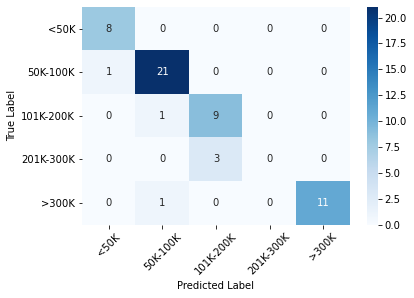

In [215]:
plot_confusion_matrix(confusion_matrix(y_test, cb_grid_pred), title='Confusion Matrix for (CB + GridSearchCV)')

## Combined CatBoost Results

In [216]:
cb_combined_results = pd.concat([cb_dico_results, cb_grid_dico_results], axis='columns')
cb_combined_results

,cb_pred,cb_grid_pred
accuracy,0.87,0.89
precision,0.83,0.85
recall,0.87,0.89
f_measure,0.85,0.87
r2,0.85,0.86


In [217]:
# Saving a copy of the cb results
cb_combined_results.to_csv('Results/cb_combined_results.csv')

# RESULTS VISUALIZATIONS

In [222]:
def plot_bar(data, title):
    data.plot.bar()
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Measure')

In [223]:
def plot_pie(data, title):
    col = data[data.columns[0]]
#     pctLabels = col.map(lambda x: f'{round(x / col.sum() * 100, 1)}%')
    pctLabels = col.map(lambda x: f'{x * 100}%')
    pctLabels = list(zip(col.index,pctLabels.to_list()))

    plt.figure(figsize=(7, 6))
    plt.pie(x=col, labels=pctLabels, 
            shadow=True, normalize=True, 
            explode=[0.09, 0.02, 0.02, 0.02, 0.02])
    plt.title(title)


## RF Results

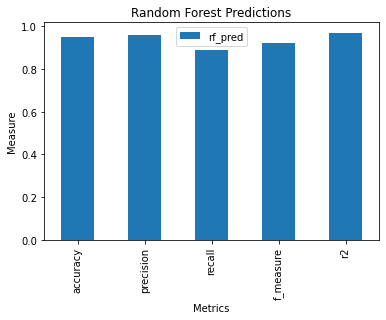

In [224]:
plot_bar(data=rf_dico_results, title='Random Forest Predictions')

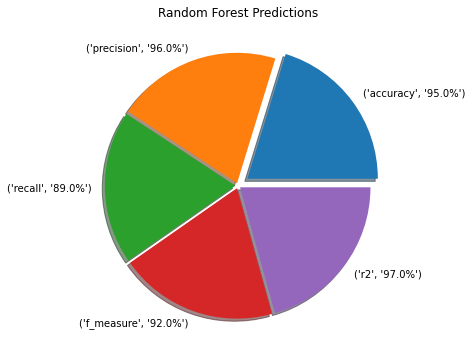

In [225]:
plot_pie(data=rf_dico_results, title='Random Forest Predictions')

# RF + Grid Results

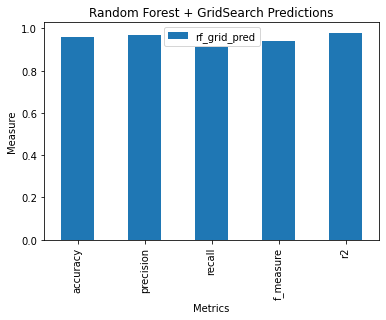

In [226]:
plot_bar(data=rf_grid_dico_results, title='Random Forest + GridSearch Predictions')

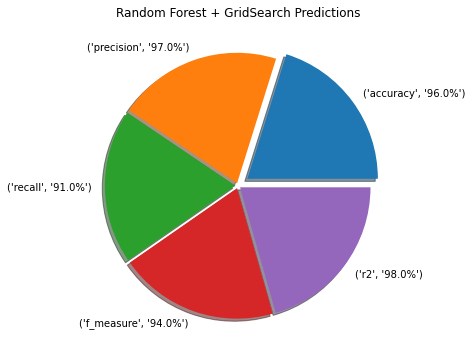

In [227]:
plot_pie(data=rf_grid_dico_results, title='Random Forest + GridSearch Predictions')

## SVC Results

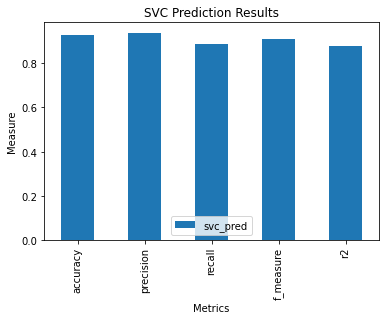

In [228]:
plot_bar(svc_dico_results, 'SVC Prediction Results')

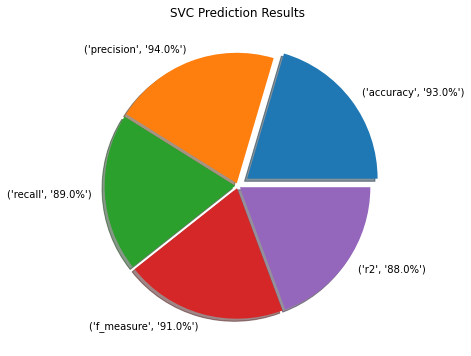

In [229]:
plot_pie(svc_dico_results, 'SVC Prediction Results')

# SVC + GridSearch Results

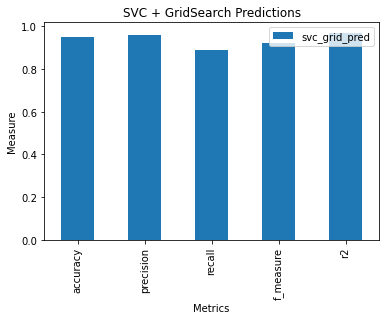

In [230]:
plot_bar(data=svc_grid_dico_results, title='SVC + GridSearch Predictions')

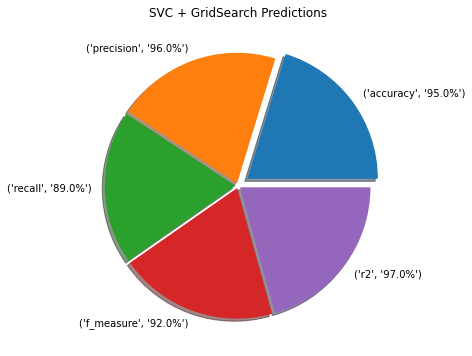

In [231]:
plot_pie(data=svc_grid_dico_results, title='SVC + GridSearch Predictions')

## Catboost

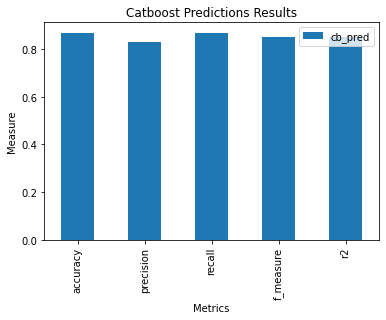

In [232]:
plot_bar(cb_dico_results, 'Catboost Predictions Results')

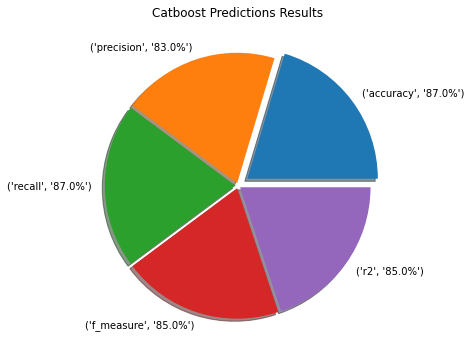

In [233]:
plot_pie(cb_dico_results, 'Catboost Predictions Results')

# Catboost + GridSearch Results

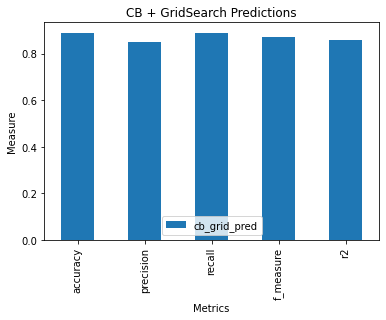

In [234]:
plot_bar(data=cb_grid_dico_results, title='CB + GridSearch Predictions')

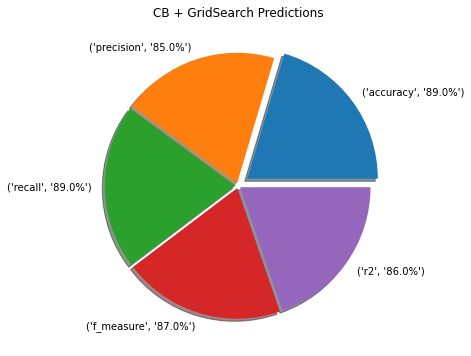

In [235]:
plot_pie(data=cb_grid_dico_results, title='CB + GridSearch Predictions')

In [278]:
# Saving the trained model
save_model(model=cb_grid, filename='cb_grid_model.sav')

saved.


## COMBINED RESULTS

In [236]:
rf_combined_results

,rf_pred,rf_grid_pred
accuracy,0.95,0.96
precision,0.96,0.97
recall,0.89,0.91
f_measure,0.92,0.94
r2,0.97,0.98


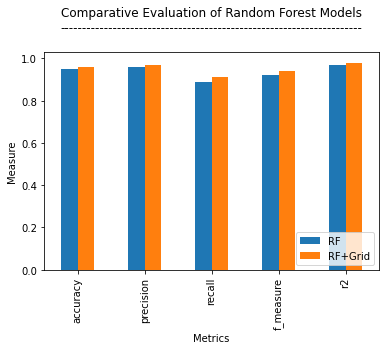

In [240]:
# plt.figure(figsize=(12,12))
rf_combined_results.plot.bar()
plt.title('Comparative Evaluation of Random Forest Models\n---------------------------------------------------------------------\n')
plt.xlabel('Metrics')
plt.ylabel('Measure')
plt.legend(labels=['RF', 'RF+Grid'], loc='lower right')

In [241]:
svc_combined_results

,svc_pred,svc_grid_pred
accuracy,0.93,0.95
precision,0.94,0.96
recall,0.89,0.89
f_measure,0.91,0.92
r2,0.88,0.97


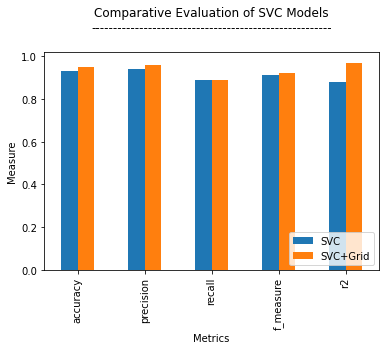

In [242]:
# plt.figure(figsize=(12,12))
svc_combined_results.plot.bar()
plt.title('Comparative Evaluation of SVC Models\n-------------------------------------------------------\n')
plt.xlabel('Metrics')
plt.ylabel('Measure')
plt.legend(labels=['SVC', 'SVC+Grid'], loc='lower right')

In [243]:
cb_combined_results

,cb_pred,cb_grid_pred
accuracy,0.87,0.89
precision,0.83,0.85
recall,0.87,0.89
f_measure,0.85,0.87
r2,0.85,0.86


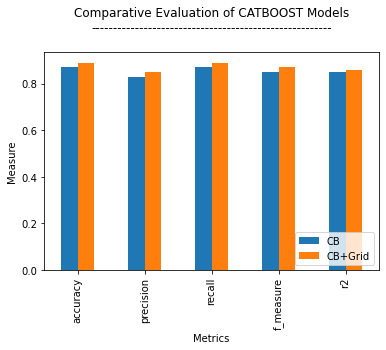

In [244]:
# plt.figure(figsize=(12,12))
cb_combined_results.plot.bar()
plt.title('Comparative Evaluation of CATBOOST Models\n-------------------------------------------------------\n')
plt.xlabel('Metrics')
plt.ylabel('Measure')
plt.legend(labels=['CB', 'CB+Grid'], loc='lower right')

## All Results

In [246]:
all_results = pd.concat([rf_combined_results, svc_combined_results, cb_combined_results], axis='columns')
all_results

,rf_pred,rf_grid_pred,svc_pred,svc_grid_pred,cb_pred,cb_grid_pred
accuracy,0.95,0.96,0.93,0.95,0.87,0.89
precision,0.96,0.97,0.94,0.96,0.83,0.85
recall,0.89,0.91,0.89,0.89,0.87,0.89
f_measure,0.92,0.94,0.91,0.92,0.85,0.87
r2,0.97,0.98,0.88,0.97,0.85,0.86


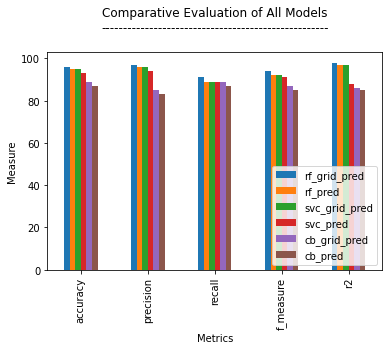

In [249]:
(all_results * 100).T.sort_values(by=['accuracy','recall'], ascending=False).T.plot.bar()
plt.title('Comparative Evaluation of All Models\n----------------------------------------------------\n')
plt.xlabel('Metrics')
plt.ylabel('Measure')
plt.legend(loc='lower right')

## ======= the end =======